# Teaching Analysis Data Wrangling and EDA

Welcome to a deep-dive of my teaching career at Mt. Scott Learning Center (MLSC) through the lens of student outcomes! 

I first look at racial data to see the breakdown of our school, then I look at pass rate...

In [1]:
#Load some premliminary packages
import pandas as pd
import numpy as np

#For loading files 
import glob

#For loading images
from IPython.display import Image

#For plotting 
import matplotlib.pyplot as plt
import seaborn as sns

#For mapping
import pydeck as pdk

#For modeling 
from sklearn.preprocessing import MinMaxScaler

In [2]:
#My mentor showed me this handy code to see all ...

pd.set_option('display.max_columns', None)

In [212]:
#Load initial data

path = '/Users/mattnelson/Desktop/GitHub/Teacher/Grade:Student Info/Mine/'
all_files = glob.glob(path + '2*.csv')

#Create a DataFrame from all the quarters of gradebooks
p = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    p.append(df)
    
df = pd.concat(p, axis=0, ignore_index=True)
df

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,Comment1,Section ID
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,NaN,NaN
1,Advisory,Q2,1,"Nelson, Matthew",11,762878,P,NaN,NaN
2,Advisory,Q2,1,"Nelson, Matthew",30,677110,P,NaN,NaN
3,Advisory,Q2,1,"Nelson, Matthew",27,622562,P,NaN,NaN
4,Advisory,Q2,1,"Nelson, Matthew",30,617201,P,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1596,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",20,728288,C,NaN,NaN
1597,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",15,723954,B,NaN,NaN
1598,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",17,713632,C,NaN,NaN
1599,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",16,687288,A,NaN,NaN


I'm guessing that the Comments and the Section ID columns are unnecessary, so I plan on dropping them, but I'm noticing that there isn't a "School Year" column. That's annoying! I can either reload all the csv's one by one and add the columns, or I can look through the aggregated df and look for the splits in Q2 and then add the corresponding years...but none of them are in order so, this might take some time. I need to find the splits. I know that Adivsory class is always the first period of the quarter...Maybe then I could use the index numbers.

Looks like the first split happens at index 105.

In [4]:
#First need to create the new column

df['SchoolYear'] = 0

In [5]:
#Now need to add the correct school year to the first 105 rows
df.loc[:104, 'SchoolYear']='2021-2022'
df.loc[105:199, 'SchoolYear']='2022-2023'
df.loc[200:332, 'SchoolYear']='2019-2020'
df.loc[333:430, 'SchoolYear']='2020-2021'
df.loc[431:526, 'SchoolYear']='2022-2023'
df.loc[527:635, 'SchoolYear']='2020-2021'
df.loc[636:761, 'SchoolYear']='2019-2020'
df.loc[762:858, 'SchoolYear']='2021-2022'
df.loc[859:964, 'SchoolYear']='2020-2021'
df.loc[965:1067, 'SchoolYear']='2021-2022'
df.loc[1068:1179, 'SchoolYear']='2020-2021'
df.loc[1180:1314, 'SchoolYear']='2019-2020'
df.loc[1315:1401, 'SchoolYear']='2022-2023'
df.loc[1402:1503, 'SchoolYear']='2021-2022'
df.loc[1504:, 'SchoolYear']='2022-2023'

In [6]:
#Need to check...looking good!
df.head(-50)

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,Comment1,Section ID,SchoolYear
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,NaN,NaN,2021-2022
1,Advisory,Q2,1,"Nelson, Matthew",11,762878,P,NaN,NaN,2021-2022
2,Advisory,Q2,1,"Nelson, Matthew",30,677110,P,NaN,NaN,2021-2022
3,Advisory,Q2,1,"Nelson, Matthew",27,622562,P,NaN,NaN,2021-2022
4,Advisory,Q2,1,"Nelson, Matthew",30,617201,P,NaN,NaN,2021-2022
...,...,...,...,...,...,...,...,...,...,...
1546,EC: Race/Cultural Stud,Q4,3,"Nelson, Matthew",3,684890,A,NaN,NaN,2022-2023
1547,EC: Race/Cultural Stud,Q4,3,"Nelson, Matthew",20,661833,D,NaN,NaN,2022-2023
1548,EC: Race/Cultural Stud,Q4,3,"Nelson, Matthew",25,679761,A,NaN,NaN,2022-2023
1549,EC: Race/Cultural Stud,Q4,3,"Nelson, Matthew",3,749978,B,NaN,NaN,2022-2023


In [7]:
#defintely want to drop comment1 and section id columns though
df=df.drop(columns=['Comment1', 'Section ID'])

In [8]:
df

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,2021-2022
1,Advisory,Q2,1,"Nelson, Matthew",11,762878,P,2021-2022
2,Advisory,Q2,1,"Nelson, Matthew",30,677110,P,2021-2022
3,Advisory,Q2,1,"Nelson, Matthew",27,622562,P,2021-2022
4,Advisory,Q2,1,"Nelson, Matthew",30,617201,P,2021-2022
...,...,...,...,...,...,...,...,...
1596,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",20,728288,C,2022-2023
1597,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",15,723954,B,2022-2023
1598,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",17,713632,C,2022-2023
1599,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",16,687288,A,2022-2023


At this point, all the school years are in the dataframe. Although there shouldn't be any missing data, I want to check. After that, I know eventually I'm going to want do some feature engineering on the Grade column (filter out the letter grades into GPA scale (A=4.0, B=3.0, C=2.0, D=1.0, F/NG/NP = 0) and then one-hot encode whether the student passed or not (P,A-D vs F/NG/NP). 

I also want to make a note that at the end of 2019-2020 school year, we didn't finish the whole term. Due to Covid-19, the school was shut down for quarantine during third quarter and all those grades are either (P)ass or (I)ncomple. One more thing to note is that my gradebooks are more nuanced that P,A,B,C,D,F/NG/NP with precentages ranging from 0-100+%. What shows up on the final report cards are the simplified integer:letter grades, but I still am condsidering reloading 15 more csv's with more detailed grades.

Further data that needs to be uploaded and added is racial demographics and zip codes, currently being converted from paper into excel sheets, and also Q1 of 2023-2024 school year gradebooks which haven't been finialized as of this note (10/29/2023).

In [9]:
#Looking for missing data values

print(df.columns)

for col in df.columns:
    n = df[col].isnull().sum()
    print(col,'has ', n, 'null values.')

Index(['Course Title', 'TermCode', 'Period', 'Teacher', 'Abs1', 'SISNumber',
       'Grade', 'SchoolYear'],
      dtype='object')
Course Title has  0 null values.
TermCode has  0 null values.
Period has  0 null values.
Teacher has  0 null values.
Abs1 has  0 null values.
SISNumber has  0 null values.
Grade has  1 null values.
SchoolYear has  0 null values.


In [10]:
null = df[df['Grade'].isnull()==True]

In [11]:
null.head()

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear
456,LA: Creative Writing,Q3,2,"Nelson, Matthew",7,828913,NaN,2022-2023


This is strange, but I'll go back and see what's going on here.

That student dropped out mid-quarter, so I'm going to drop this row.

This does bring up some wrinkles with this study around entry and exit points for students. Many students drop throughout the quarter and they are no represented here. Some students show up mid-quarter and might fail but have a limited amount of attendance issues since they came late. For now we'll move forward.

In [12]:
df=df.drop([456])

In [13]:
#Sanity check
new_null = df[df['Grade'].isnull()==True]
new_null.head()

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear


In [14]:
df

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,2021-2022
1,Advisory,Q2,1,"Nelson, Matthew",11,762878,P,2021-2022
2,Advisory,Q2,1,"Nelson, Matthew",30,677110,P,2021-2022
3,Advisory,Q2,1,"Nelson, Matthew",27,622562,P,2021-2022
4,Advisory,Q2,1,"Nelson, Matthew",30,617201,P,2021-2022
...,...,...,...,...,...,...,...,...
1596,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",20,728288,C,2022-2023
1597,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",15,723954,B,2022-2023
1598,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",17,713632,C,2022-2023
1599,EC: Race/Cultural Stud,Q4,8,"Nelson, Matthew",16,687288,A,2022-2023


Getting the grade and attendance data for each quarter wasn't too difficult with the assistence of the school's registrar. They easily created Excel sheets for each quarter for each year, with approval for public use after student names had been deleted. But data for race/ethnicity and zip codes had to be hardcopied for each year. After receiving the reports, I had to manually create my own spreadsheet through a process of filtering an aggregation of students in all my classes reduced to one row per student, then finding each student's race/ethnicity data in one hardcopy, and then finding their zip code in another.

Here is the result.

In [15]:
rz = pd.read_csv('/Users/mattnelson/Desktop/GitHub/Teacher/Grade:Student Info/Mine/Zip and Race - Sheet1.csv')

In [16]:
rz

,SIS Number,Race,Zip
0,804244,Hispanic,97206
1,741902,White,97202
2,723625,White,97202
3,727843,White,97206
4,826730,White,97220
...,...,...,...
327,712121,Two or More,97206
328,560619,White,97266
329,689565,White,97266
330,531348,White,97213


In [17]:
me = pd.merge(df, rz, left_on='SISNumber', right_on='SIS Number').drop('SIS Number', axis=1)
me

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,Race,Zip
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,2021-2022,White,97206
1,Zines B,Q2,5,"Nelson, Matthew",16,717118,A,2021-2022,White,97206
2,Advisory,Q2,1,"Nelson, Matthew",25,717118,NP,2022-2023,White,97206
3,G: Analytical Geometry Q2,Q2,4,"Nelson, Matthew",26,717118,C,2022-2023,White,97206
4,Advisory,Q2,1,"Nelson, Matthew",13,717118,P,2019-2020,White,97206
...,...,...,...,...,...,...,...,...,...,...
1595,LA: Creative Writing,Q4,2,"Nelson, Matthew",8,763303,A,2022-2023,White,97266
1596,LA: Creative Writing,Q4,2,"Nelson, Matthew",20,724127,B,2022-2023,Two or More,97202-4064
1597,H: Periodic Functions/Matrices Q4,Q4,4,"Nelson, Matthew",8,781342,A,2022-2023,White,97266
1598,H: Periodic Functions/Matrices Q4,Q4,7,"Nelson, Matthew",4,809530,A,2022-2023,Black/African American,97219


In [18]:
#Now I want to make sure my manually inputed data doesn't have any null values

for col in me.columns:
    n = me[col].isnull().sum()
    print(col,'has ', n, 'null values.')
    
#Success! 

Course Title has  0 null values.
TermCode has  0 null values.
Period has  0 null values.
Teacher has  0 null values.
Abs1 has  0 null values.
SISNumber has  0 null values.
Grade has  0 null values.
SchoolYear has  0 null values.
Race has  0 null values.
Zip has  0 null values.


In [19]:
#I'm too excited to not do some preliminary data dives and bar graphs, just for giggles!

race_counts = me.groupby('Race')['Race'].count().sort_values()
print(race_counts)

Race
Native Hawaiian/Other Pacific Islander      1
Asian                                      11
Black/African American                    138
Two or More                               170
Hispanic                                  281
White                                     999
Name: Race, dtype: int64


In [20]:
race_counts.index

Index(['Native Hawaiian/Other Pacific Islander', 'Asian',
       'Black/African American', 'Two or More', 'Hispanic', 'White'],
      dtype='object', name='Race')

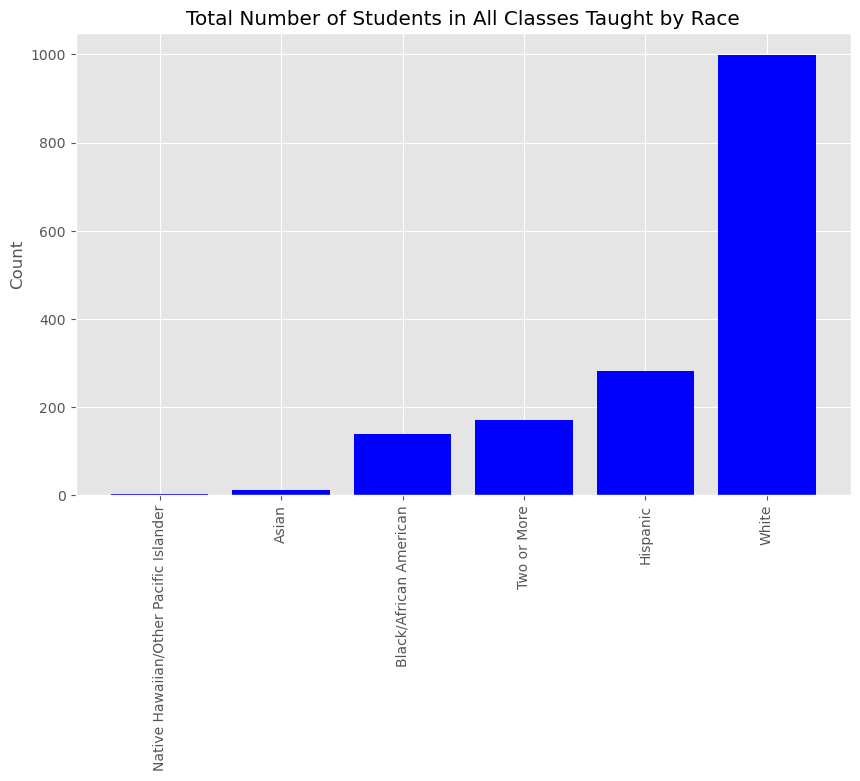

In [21]:
plt.style.use('ggplot')

races = race_counts.index
counts = race_counts

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(races, counts, color = 'b')
ax.set_ylabel('Count')
ax.set_title('Total Number of Students in All Classes Taught by Race')
plt.xticks(rotation=90)
plt.show()

The caveat of this graph is that many of these students I've had mutliple times. I need to group by Student ID and then race, and then I also need to do this by percentage instead of total. 

Let's start with Student IDs

In [22]:
all_races = me['Race'].unique()
print(all_races)

['White' 'Black/African American' 'Hispanic' 'Two or More' 'Asian'
 'Native Hawaiian/Other Pacific Islander']


In [23]:
race_counts_by_ID = me.groupby(['Race'])['SISNumber'].nunique().sort_values()
race_counts_by_ID

Race
Native Hawaiian/Other Pacific Islander      1
Asian                                       3
Black/African American                     21
Two or More                                38
Hispanic                                   67
White                                     201
Name: SISNumber, dtype: int64

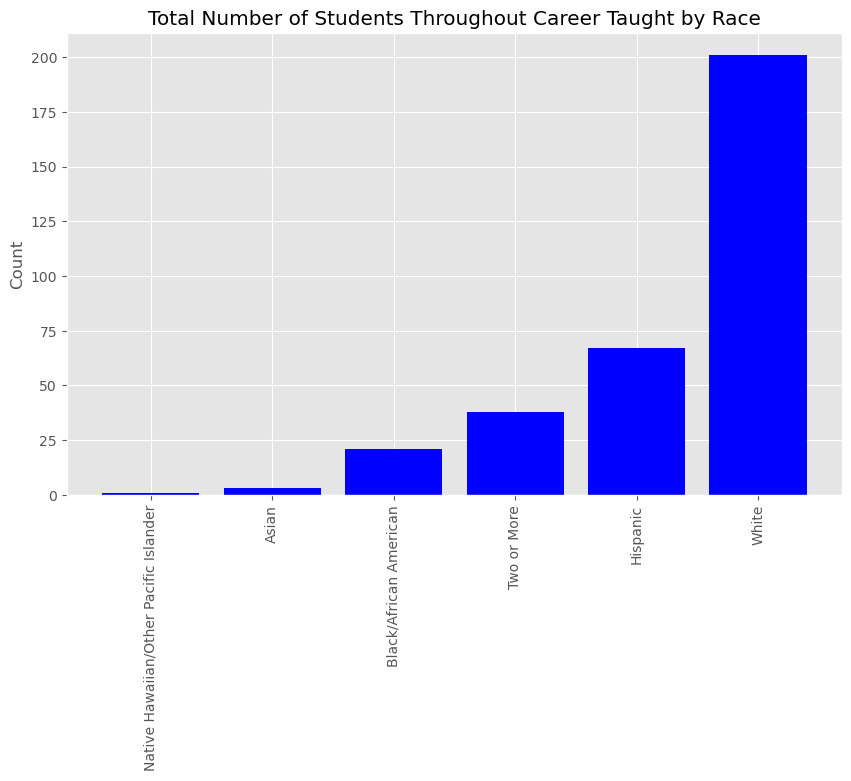

In [24]:
plt.style.use('ggplot')

races = race_counts_by_ID.index
counts = race_counts_by_ID

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(races, counts, color='b')
ax.set_ylabel('Count')
ax.set_title('Total Number of Students Throughout Career Taught by Race')
plt.xticks(rotation=90)
plt.show()

This is nice but need to make it a percent to be easier to compare to Portland demographics. 

In [25]:
per = (race_counts_by_ID/(race_counts_by_ID.sum())*100)
per

Race
Native Hawaiian/Other Pacific Islander     0.302115
Asian                                      0.906344
Black/African American                     6.344411
Two or More                               11.480363
Hispanic                                  20.241692
White                                     60.725076
Name: SISNumber, dtype: float64

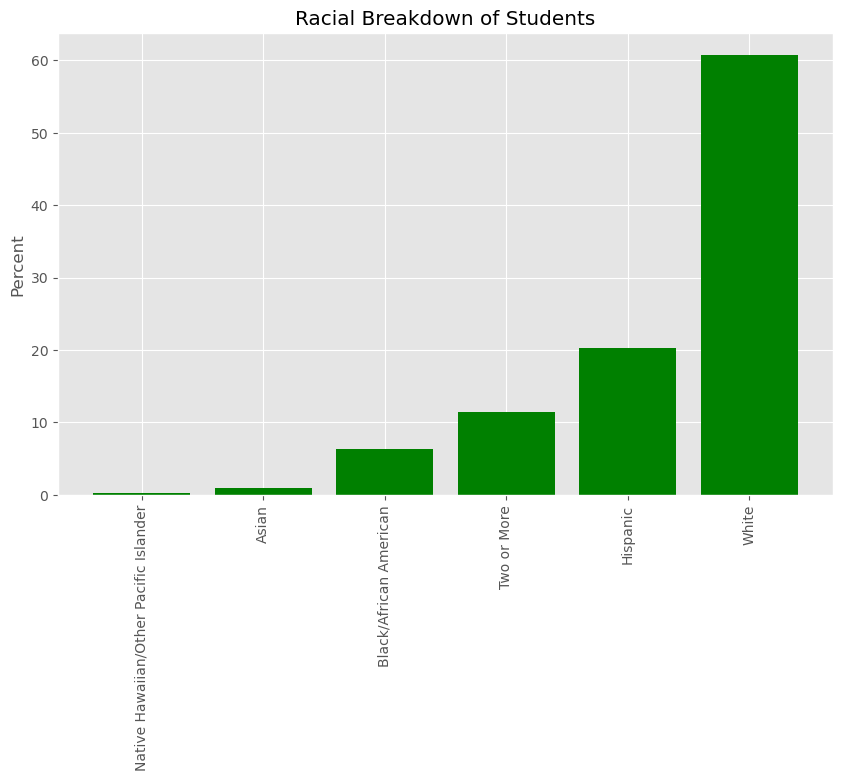

In [26]:
plt.style.use('ggplot')

races = per.index
counts = per

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(races, counts, color='g')
ax.set_ylabel('Percent')
ax.set_title('Racial Breakdown of Students')
plt.xticks(rotation=90)
plt.show()

Using data found on the Portland Public Schools website, I want to compare my career teaching with the current racial demographics of the district as a whole in which I teach. Below is the website where I found their self-reported data.

https://www.pps.net/Page/2112 (Accessed on 11/05/2023, 1:05PM)

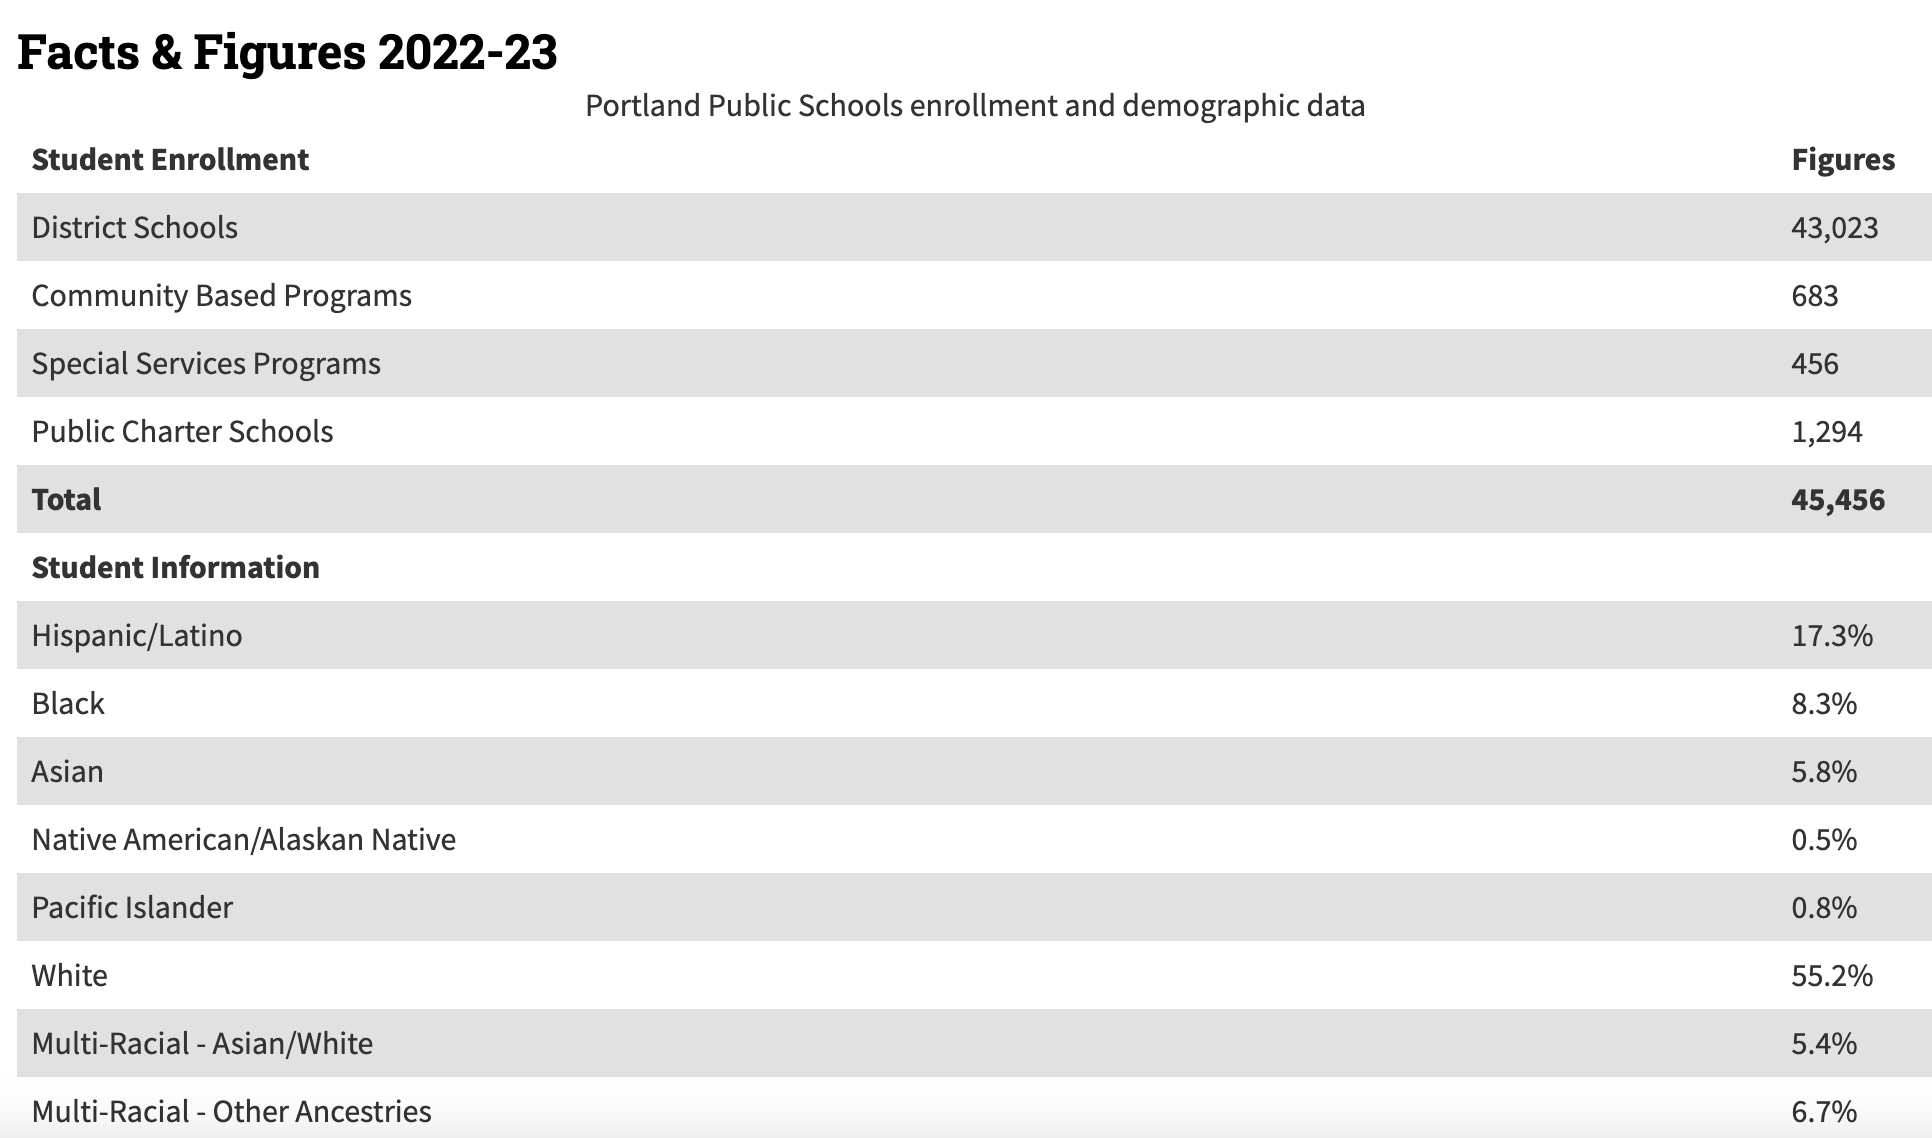

In [27]:
#Here's the screenshot of the data

Image(filename='/Users/mattnelson/Desktop/GitHub/Teacher/Grade:Student Info/Mine/PPS Demographics .png')

In [28]:
#I'm going to add Native American/Alaskan Native and Pacic Islander
#togther as well as both multi-racial identifications 

countsPPS = [1.3, 5.8, 8.3, 12.1, 17.3, 55.2]


In [29]:
diffs = counts-countsPPS
print(diffs)

Race
Native Hawaiian/Other Pacific Islander   -0.997885
Asian                                    -4.893656
Black/African American                   -1.955589
Two or More                              -0.619637
Hispanic                                  2.941692
White                                     5.525076
Name: SISNumber, dtype: float64


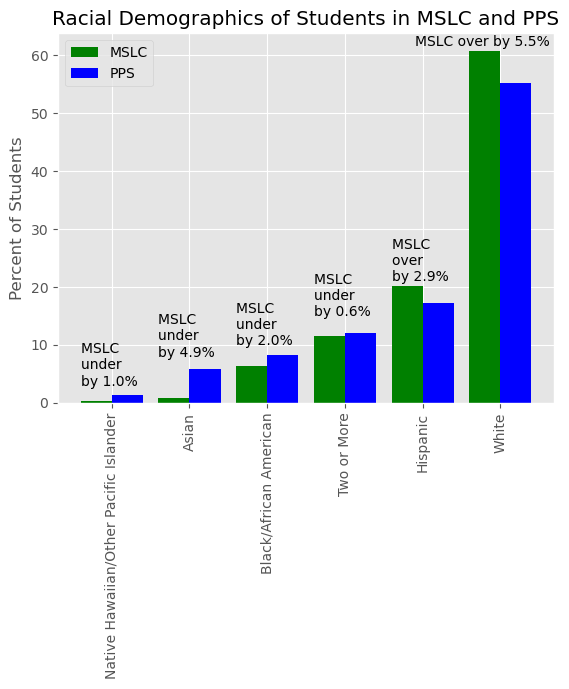

In [30]:
X = races
MSLC = counts
PPS = countsPPS 
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, MSLC, 0.4, label = 'MSLC', color='g') 
plt.bar(X_axis + 0.2, PPS, 0.4, label = 'PPS', color='b') 

plt.annotate(text='MSLC over by 5.5%', xy=(3.9,61.5))
plt.annotate(text='MSLC \nover \nby 2.9%', xy=(3.6,21))
plt.annotate(text='MSLC \nunder \nby 0.6%', xy=(2.6,15))
plt.annotate(text='MSLC \nunder \nby 2.0%', xy=(1.6,10))
plt.annotate(text='MSLC \nunder \nby 4.9%', xy=(0.6,8))
plt.annotate(text='MSLC \nunder \nby 1.0%', xy=(-0.4,3))

plt.xticks(X_axis, X, rotation=90)  
plt.ylabel("Percent of Students") 
plt.title("Racial Demographics of Students in MSLC and PPS") 
plt.legend() 
plt.show() 

My career at MSLC has been pretty close to the demographics of PPS, but I want to look a little closer at data from the nearest two high schools: Cleveland and Franklin High School (CHS, FHS).

I used 2022-23 At-A-Glance data from the Oregon Department of Education for both schools.
CHS: https://www.ode.state.or.us/data/reportcard/reports.aspx?id=909

FSH: https://www.ode.state.or.us/data/reportcard/reports.aspx?id=909

In [31]:
#These are the counts for Cleveland and Franklin
chs = [0, 9, 2, 12, 9, 68]
fhs = [1, 13, 5, 9, 20, 52]

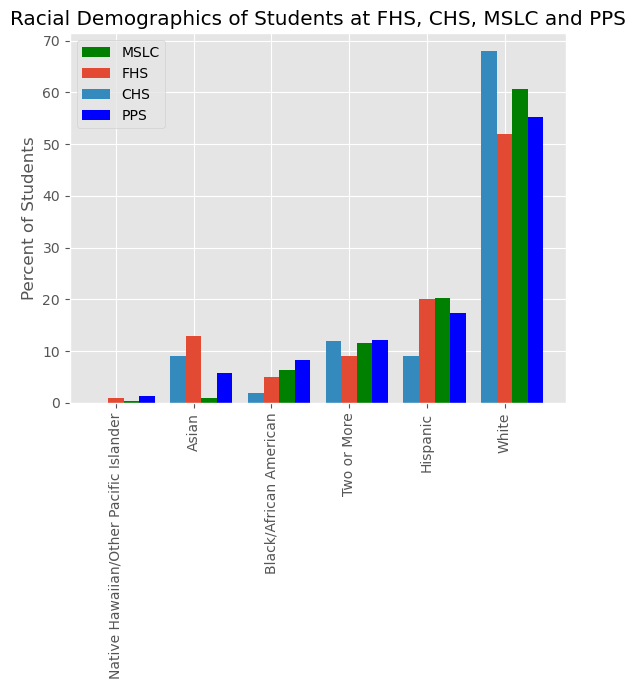

In [32]:
X = races
MSLC = counts

  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis + 0.2, MSLC, 0.2, label = 'MSLC', color='g') 
plt.bar(X_axis, fhs, 0.2, label = 'FHS') 
plt.bar(X_axis - 0.2, chs, 0.2, label = 'CHS')
plt.bar(X_axis + 0.4, PPS, 0.2, label = 'PPS', color='b') 


plt.xticks(X_axis, X, rotation=90)  
plt.ylabel("Percent of Students") 
plt.title("Racial Demographics of Students at FHS, CHS, MSLC and PPS") 
plt.legend() 
plt.show() 

It would be interesting to see how many students we get from each high schools. 

But some preliminary sightings: 

MSLC has a higher percentage of White students than Franklin, but less than Cleveland.

MSLC has a slightly higher percentage of Hispanic students than Franklin and a much higher percentage than Cleveland.

MSLC has a slightly lower percentage of students of two or more races than Cleveland, but a higher percentage than Franklin.

MSLC has a higher percentage of Black/African American than both high schools.

MSLC has a lower percentage of Asian students than both high schools.

MSLC has a lower percentage of Native Hawaiian/Other Pacific Islander thanFranklin but is higher than Cleveland.

In [33]:
#Creating two DataFrames. One with the target variable being Grade and another being Pass/No Pass. Then 
#engineering some features. I need to know the data types though.

me.dtypes

Course Title    object
TermCode        object
Period           int64
Teacher         object
Abs1             int64
SISNumber        int64
Grade           object
SchoolYear      object
Race            object
Zip             object
dtype: object

There are a few things I need to do before I can really start cooking. The school year split is not very helpful, and having the TermCode as an object isn't hugely helpful. I also need to create a new column that goes through and parses whether a student passed or not passed.

I also want to convert the A-F grading scale to a 4.0-0.0 GPA sclae. But it gets confusing after 2019-2020 school year when I dropped all Fs in favor of NP which doesn't affect a student's GPA. 

In [34]:
me['Grade'].unique()

#What is that WF??? I put the grades in and I don't even know. 
#Let's check.

array(['P', 'A', 'NP', 'C', 'D', 'B', 'I', 'NG', 'F', 'WF'], dtype=object)

In [35]:
wf = me[me['Grade']=='WF']
wf

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,Race,Zip
1484,A: Functions/Linear Equations Q1,Q1,4,"Nelson, Matthew",17,695085,WF,2019-2020,Hispanic,97206


It looks like it's a withdrawal F. It counts as an F, no pass.

In [36]:
me['C/NC'] = np.where(me['Grade'].isin(['P', 'A', 'B', 'C', 'D']), 
                      1,
                      np.where(me['Grade'].isin(['NP', 'I', 'NG', 'F', 'WF']), 
                      0, 'Unkonwn'))

In [37]:
def get_GPA(grade):
    if grade == 'A':
        return 4
    elif grade == 'B':
        return 3
    elif grade == 'C':
        return 2
    elif grade == 'D':
        return 1
    elif grade =='F':
        return 0
    elif grade == 'WF':
        return 0
    else:
        return None

In [38]:
me['GPA'] = me['Grade'].apply(get_GPA)

In [39]:
me

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,Race,Zip,C/NC,GPA
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,2021-2022,White,97206,1,NaN
1,Zines B,Q2,5,"Nelson, Matthew",16,717118,A,2021-2022,White,97206,1,4.0
2,Advisory,Q2,1,"Nelson, Matthew",25,717118,NP,2022-2023,White,97206,0,NaN
3,G: Analytical Geometry Q2,Q2,4,"Nelson, Matthew",26,717118,C,2022-2023,White,97206,1,2.0
4,Advisory,Q2,1,"Nelson, Matthew",13,717118,P,2019-2020,White,97206,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,LA: Creative Writing,Q4,2,"Nelson, Matthew",8,763303,A,2022-2023,White,97266,1,4.0
1596,LA: Creative Writing,Q4,2,"Nelson, Matthew",20,724127,B,2022-2023,Two or More,97202-4064,1,3.0
1597,H: Periodic Functions/Matrices Q4,Q4,4,"Nelson, Matthew",8,781342,A,2022-2023,White,97266,1,4.0
1598,H: Periodic Functions/Matrices Q4,Q4,7,"Nelson, Matthew",4,809530,A,2022-2023,Black/African American,97219,1,4.0


In [40]:
#I want to turn the two columns into numeric columns

me['GPA'] = pd.to_numeric(me['GPA'])
me['C/NC'] = pd.to_numeric(me['C/NC'])
me.dtypes

Course Title     object
TermCode         object
Period            int64
Teacher          object
Abs1              int64
SISNumber         int64
Grade            object
SchoolYear       object
Race             object
Zip              object
C/NC              int64
GPA             float64
dtype: object

Time to start looking at some data! 

In [41]:
me['GPA'].describe()

count    1141.000000
mean        2.592463
std         1.204340
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: GPA, dtype: float64

In [42]:
me['GPA'].value_counts()

4.0    350
3.0    282
1.0    240
2.0    236
0.0     33
Name: GPA, dtype: int64

In [43]:
grades = ['A', 'B', 'C', 'D', 'F']
grade_counts = me['GPA'].value_counts()

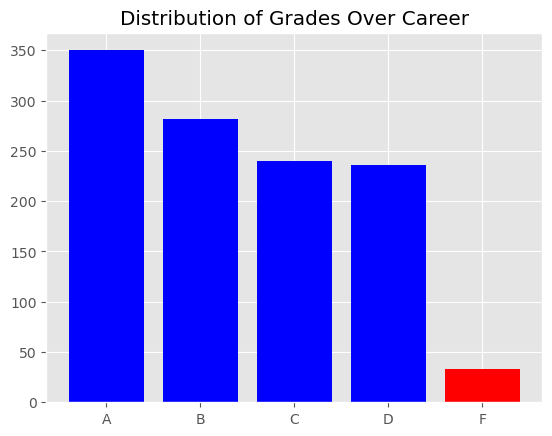

In [44]:
plt.bar(grades, grade_counts, color=['b', 'b', 'b', 'b', 'r'])
plt.title('Distribution of Grades Over Career')
plt.show()

I actually don't think this is compltely accurate because it doens't give the best understanding of distirubtion.

I need to count up the amount of people who don't pass.

In [45]:
me['Grade'].value_counts()

A     350
P     320
B     282
D     240
C     236
NG     90
F      32
I      28
NP     21
WF      1
Name: Grade, dtype: int64

In [46]:
me[~me['Grade'].isin(['A', 'B', 'C','D'])].describe()

,Period,Abs1,SISNumber,C/NC,GPA
count,492.000000,492.000000,492.000000,492.000000,33.0
mean,2.888211,18.481707,673082.936992,0.650407,0.0
std,2.409609,11.737353,86990.063990,0.477327,0.0
min,1.000000,0.000000,314608.000000,0.000000,0.0
25%,1.000000,8.750000,622623.000000,0.000000,0.0
50%,1.000000,17.000000,663205.000000,1.000000,0.0
75%,4.000000,27.000000,725482.000000,1.000000,0.0
max,8.000000,44.000000,825155.000000,1.000000,0.0


In [47]:
gra = ['A', 'B','C','D','No Pass']
gra_count = [350,282,236,240,172]

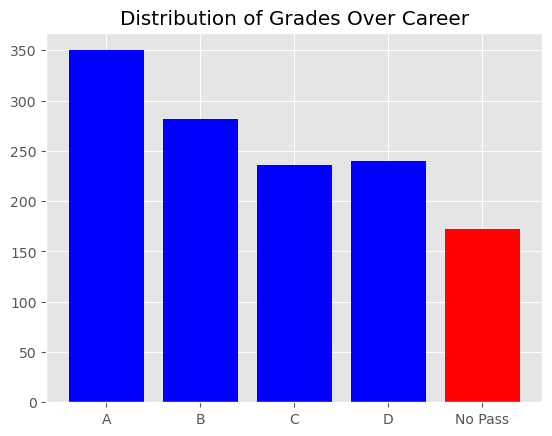

In [48]:
plt.bar(gra, gra_count, color = ['b', 'b', 'b', 'b', 'r'])
plt.title('Distribution of Grades Over Career')
plt.show()

This doesn't look great, but if you look at credit vs no-credit then things are a little more drastic.

In [49]:
credit = me['C/NC'].value_counts()
credit

1    1428
0     172
Name: C/NC, dtype: int64

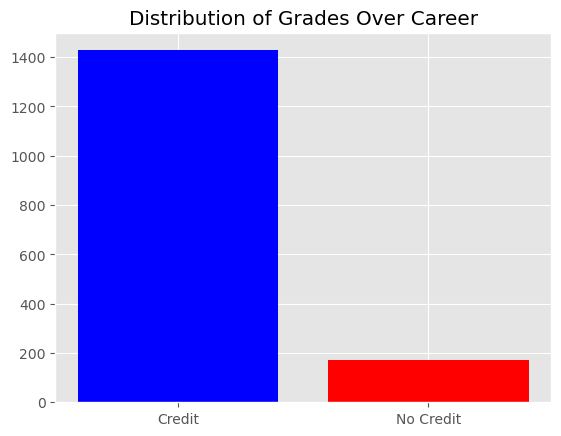

In [50]:
plt.bar(['Credit', 'No Credit'], credit, color =['b', 'r'])
plt.title('Distribution of Grades Over Career')
plt.show()

In [51]:
all_grades = me['Grade'].value_counts()

In [52]:
all_grades.index

Index(['A', 'P', 'B', 'D', 'C', 'NG', 'F', 'I', 'NP', 'WF'], dtype='object')

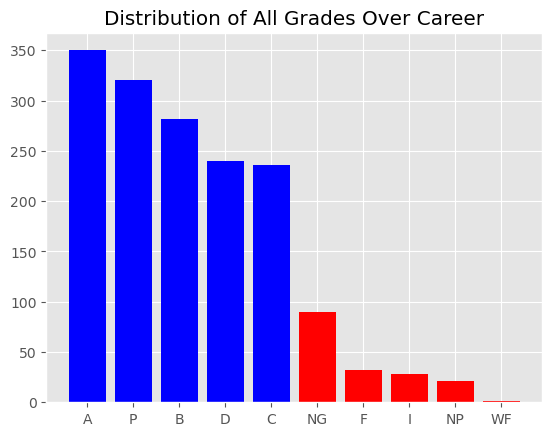

In [53]:
plt.bar(all_grades.index, all_grades, color=['b', 'b','b','b','b','r','r','r','r','r'])
plt.title('Distribution of All Grades Over Career')
plt.show()

Okay, let's break this down by Race and then by Zip Code

In [54]:
grades_by_race = me.groupby(['Race'])['Grade'].value_counts()

In [55]:
me[me['Race']=='White']['Grade'].value_counts()

A     240
P     194
B     180
D     150
C     136
NG     52
F      19
NP     14
I      14
Name: Grade, dtype: int64

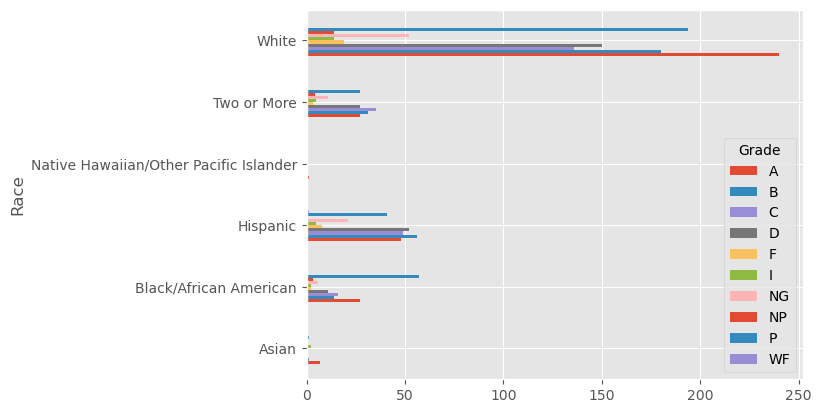

In [56]:
me.groupby(['Race'])['Grade'].value_counts().unstack().plot.barh();


Text(0.5, 1.0, 'Grade Distribution by Race')

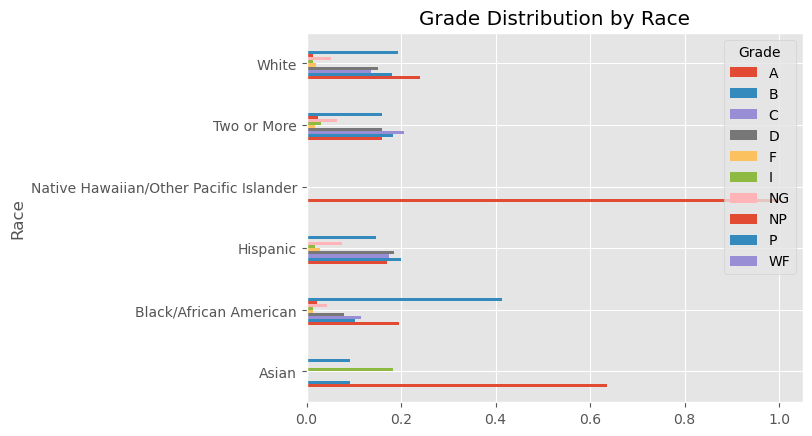

In [57]:

me.groupby(['Race'])['Grade'].value_counts(normalize=True).unstack().plot.barh()
plt.title('Grade Distribution by Race')

This graph is too squished so I think I need to look at grade distibution for  for each race. But I don't think this is perfect yet. I need to split between Credit and No Credit.

In [58]:
for race in all_races:
    print('For ', race, 'race students:' '\n', me[me['Race']==race]['C/NC'].value_counts(normalize=True).sort_values(ascending=False))

For  White race students:
 1    0.900901
0    0.099099
Name: C/NC, dtype: float64
For  Black/African American race students:
 1    0.905797
0    0.094203
Name: C/NC, dtype: float64
For  Hispanic race students:
 1    0.875445
0    0.124555
Name: C/NC, dtype: float64
For  Two or More race students:
 1    0.864706
0    0.135294
Name: C/NC, dtype: float64
For  Asian race students:
 1    0.818182
0    0.181818
Name: C/NC, dtype: float64
For  Native Hawaiian/Other Pacific Islander race students:
 1    1.0
Name: C/NC, dtype: float64


In [59]:
asian = {'Passed': 0.818182, 'Did not pass': 0.181818}
native = {'Passed': 1, 'Did not pass': 0}

In [60]:
for race in all_races:
    print('For ', race, 'race students:' '\n', me[me['Race']==race]['GPA'].value_counts(normalize=True).sort_index(ascending=False))

For  White race students:
 4.0    0.331034
3.0    0.248276
2.0    0.187586
1.0    0.206897
0.0    0.026207
Name: GPA, dtype: float64
For  Black/African American race students:
 4.0    0.385714
3.0    0.200000
2.0    0.228571
1.0    0.157143
0.0    0.028571
Name: GPA, dtype: float64
For  Hispanic race students:
 4.0    0.224299
3.0    0.261682
2.0    0.228972
1.0    0.242991
0.0    0.042056
Name: GPA, dtype: float64
For  Two or More race students:
 4.0    0.219512
3.0    0.252033
2.0    0.284553
1.0    0.219512
0.0    0.024390
Name: GPA, dtype: float64
For  Asian race students:
 4.0    0.875
3.0    0.125
Name: GPA, dtype: float64
For  Native Hawaiian/Other Pacific Islander race students:
 4.0    1.0
Name: GPA, dtype: float64


In [61]:
ag = {'A': 0.875, 'B': 0.125, 'C':0, 'D':0, 'F':0}
hg = {'A': 1, 'B': 0, 'C':0, 'D':0, 'F':0}

In [62]:
key=ag.keys()
value1 = ag.values()
value2 = hg.values()

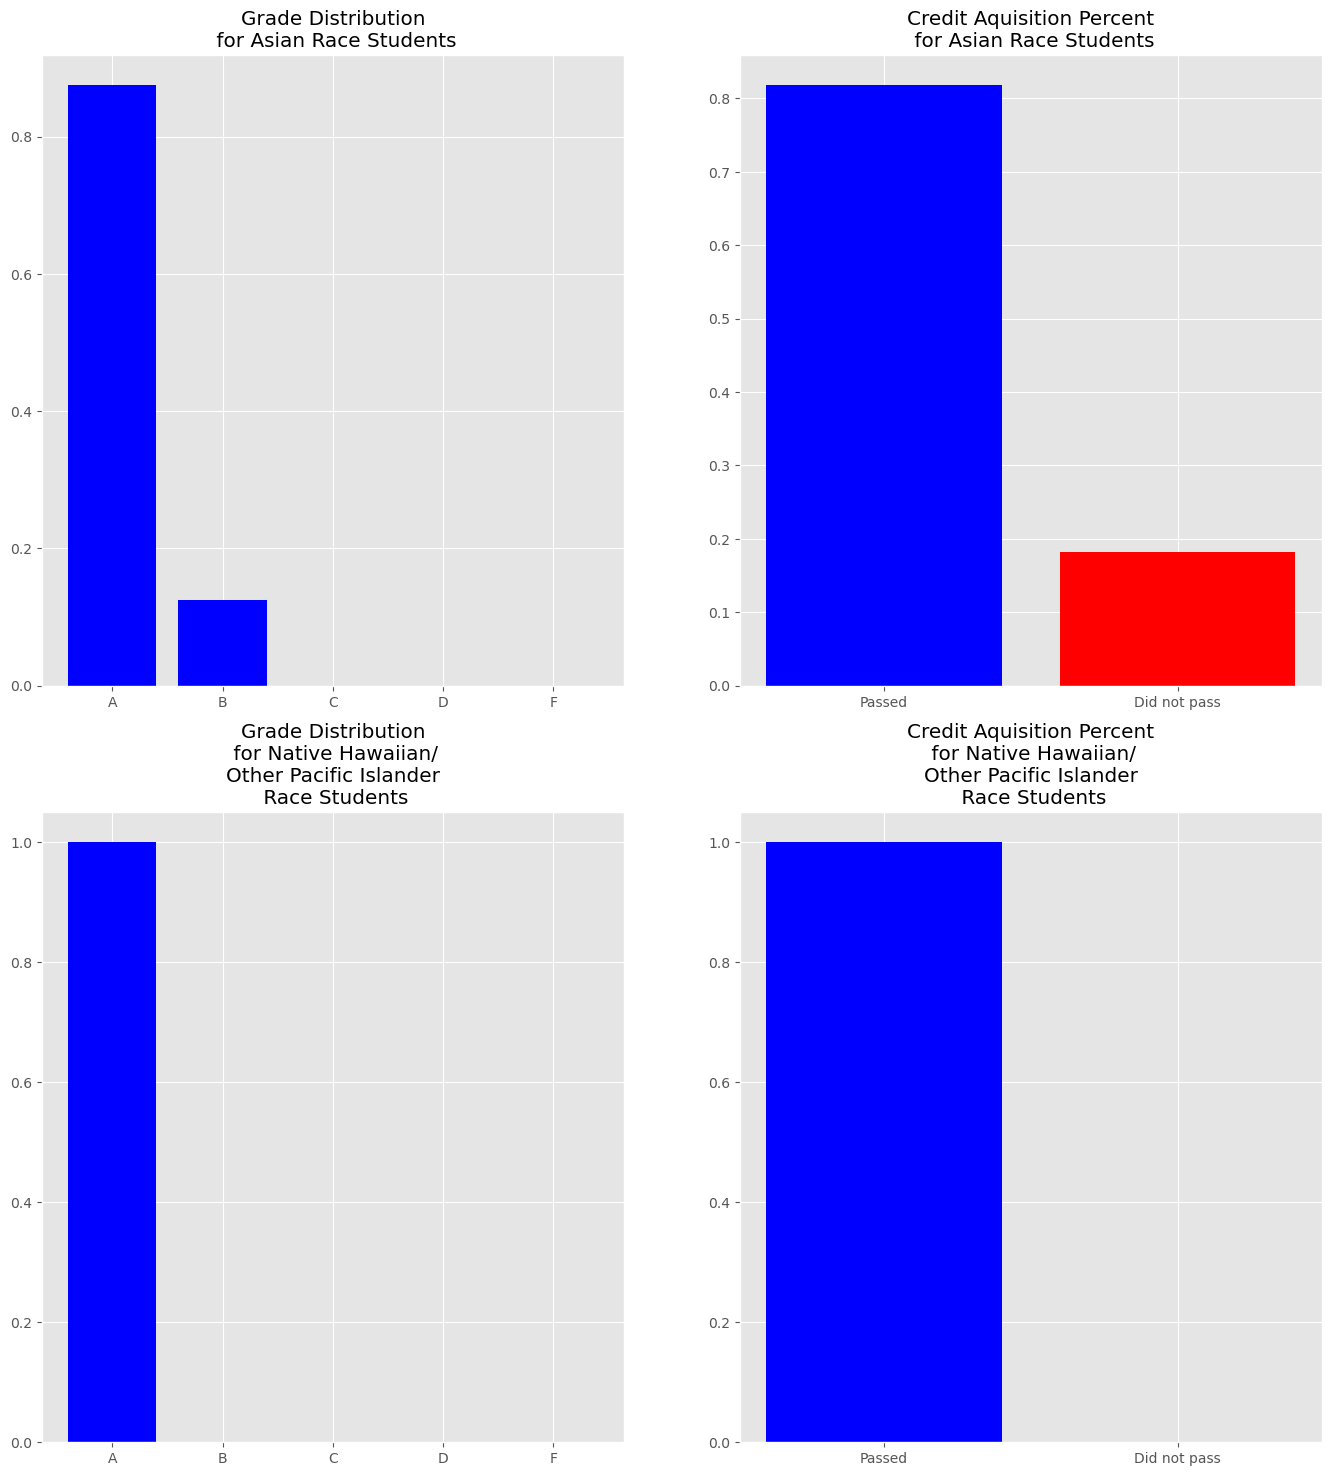

In [63]:
plt.subplot(2,2,1)
plt.bar(key, value1, color=['b'])
plt.title('Grade Distribution\n for Asian Race Students')

plt.subplot(2,2,2)
plt.bar(asian.keys(), asian.values(), color=['b', 'r'])
plt.title('Credit Aquisition Percent\n for Asian Race Students')

plt.subplot(2,2,3)
plt.bar(key, value2, color=['b'])
plt.title('Grade Distribution\n for Native Hawaiian/\nOther Pacific Islander\n Race Students')

plt.subplot(2,2,4)
plt.bar(native.keys(), native.values(), color=['b'])
plt.title('Credit Aquisition Percent\n for Native Hawaiian/\nOther Pacific Islander\n Race Students')
plt.subplots_adjust(left=0, bottom=None, right=2, top=3, wspace=None, hspace=None)
plt.show()

In [64]:
def gbr(race):
    count = me[me['Race']==race]['GPA'].value_counts(normalize=True).sort_index(ascending=False)
    credit = me[me['Race']==race]['C/NC'].value_counts(normalize=True).sort_index(ascending=False)
    
    plt.subplot(1, 2, 1)
    plt.bar(['A', 'B','C', 'D', 'F'], count, color=[ 'b', 'b', 'b', 'b', 'r'])
    plt.title('Grade Distribution\n for {} Race Students'.format(race))
    plt.ylim(0, 0.4)
    
    plt.subplot(1, 2, 2)
    plt.bar(['Pass', 'Did Not Pass'], credit, color=['b', 'r'])
    plt.title('Credit Aquisition Percent\n for {} Race Students'.format(race))
    plt.subplots_adjust(left=0, bottom=None, right=2, top=None, wspace=None, hspace=None)
    plt.show();

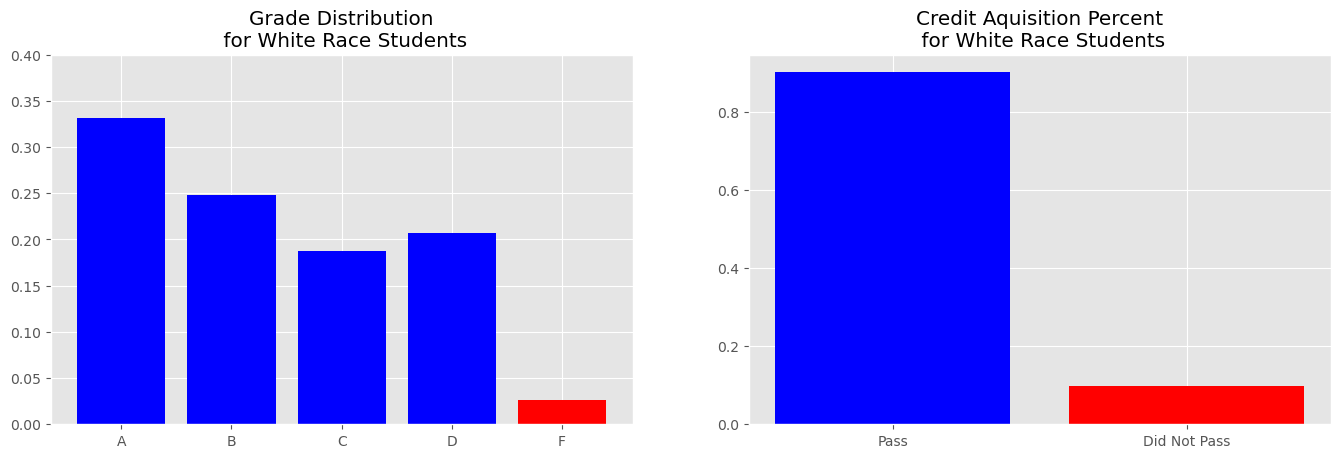

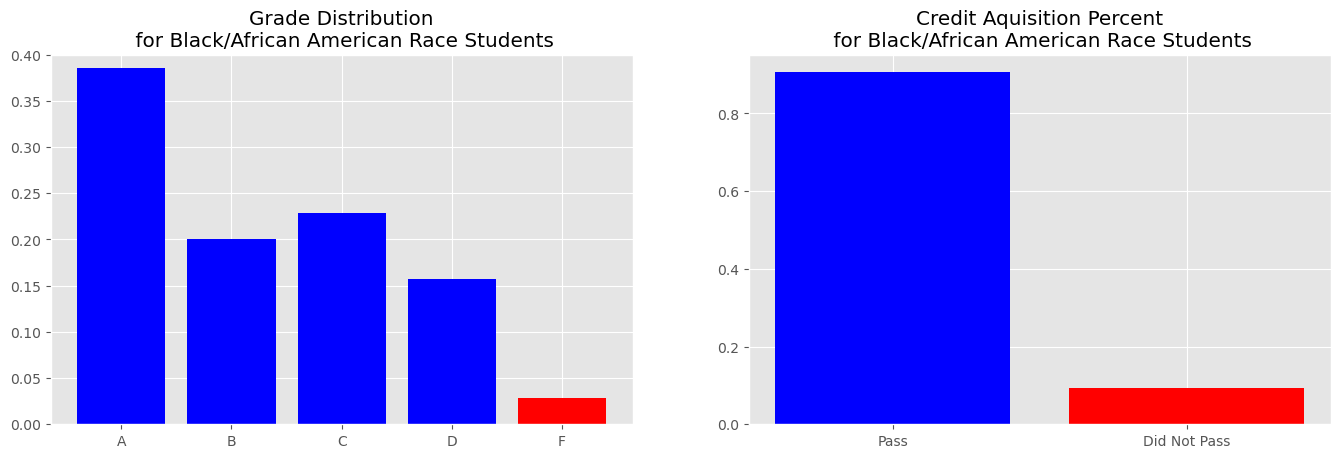

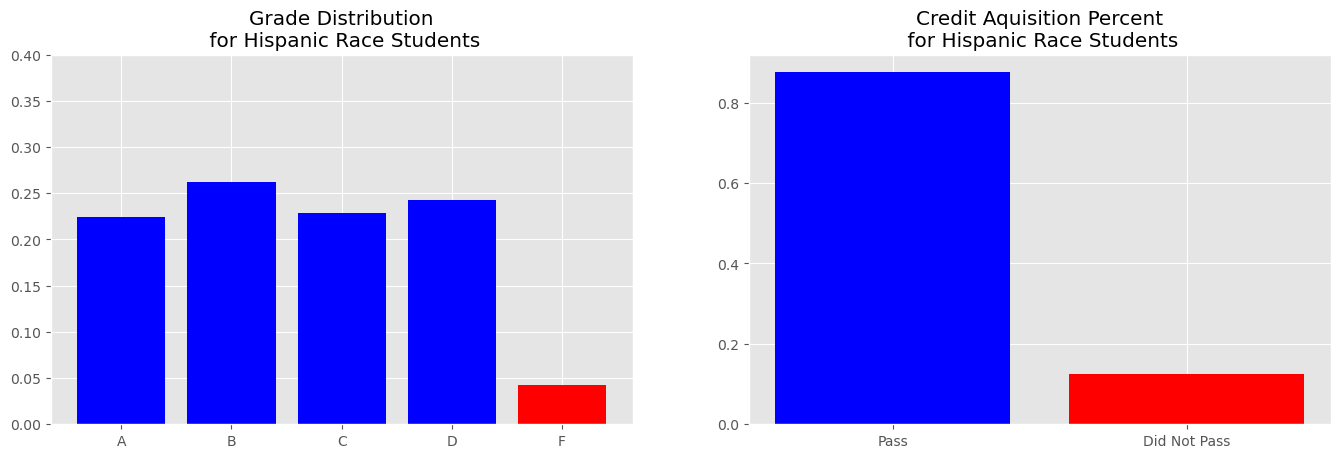

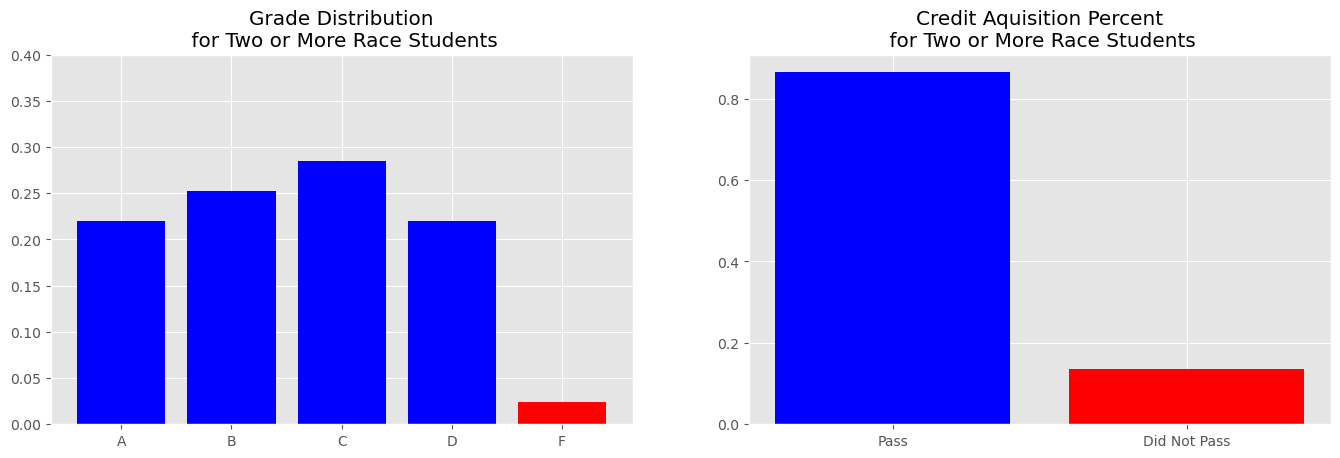

In [65]:
for race in ['White', 'Black/African American', 'Hispanic', 'Two or More']:
    gbr(race)

This isn't pretty and I need to clean it up a bit, but it does make me wonder right away why White students and Asian studnets have the highest percentages of grades being As. For Black students, the highest grade is P for passing which is only really used for Advisory and during Covid. I'm wondering what is going on there.

Then for Hispanic students and students of Two or More races, their most likely grades are B and Cs, respectively. That seems like something to investigate.

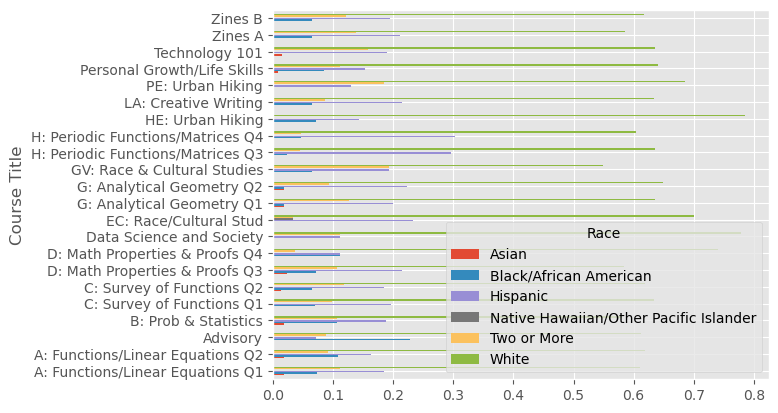

In [66]:
me.groupby(['Course Title'])['Race'].value_counts(normalize=True).unstack().plot.barh();

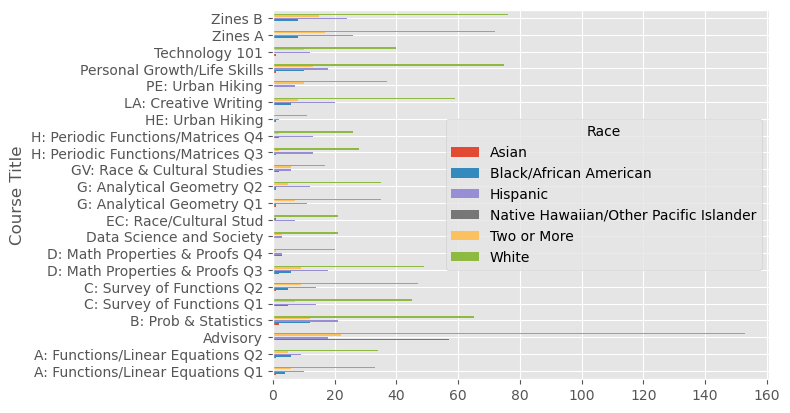

In [67]:
me.groupby(['Course Title'])['Race'].value_counts().unstack().plot.barh();

I want to create a new column that tracks what year of teaching each SchoolYear is. 

In [68]:
me['SchoolYear'].unique()

array(['2021-2022', '2022-2023', '2019-2020', '2020-2021'], dtype=object)

In [69]:
 def get_year(year):
    if year == '2019-2020':
        return 1
    elif year == '2020-2021':
        return 2
    elif year == '2021-2022':
        return 3
    else:
        return 4
                

In [70]:
me['TeachingYear'] = me['SchoolYear'].apply(get_year)

I want to differentiate between math classes and non-math classes. I'm going to give it a 1 for math and 0 for non-math.

In [71]:
me['Course Title'].unique()

array(['Advisory', 'Zines B', 'G: Analytical Geometry Q2',
       'A: Functions/Linear Equations Q2', 'Personal Growth/Life Skills',
       'C: Survey of Functions Q1', 'C: Survey of Functions Q2',
       'LA: Creative Writing', 'A: Functions/Linear Equations Q1',
       'D: Math Properties & Proofs Q3', 'D: Math Properties & Proofs Q4',
       'B: Prob & Statistics', 'Technology 101',
       'G: Analytical Geometry Q1', 'Zines A', 'Data Science and Society',
       'PE: Urban Hiking', 'H: Periodic Functions/Matrices Q3',
       'H: Periodic Functions/Matrices Q4', 'EC: Race/Cultural Stud',
       'HE: Urban Hiking', 'GV: Race & Cultural Studies'], dtype=object)

In [72]:
me['M/NM'] = np.where(me['Course Title'].isin(['G: Analytical Geometry Q2', 
                                               'A: Functions/Linear Equations Q2', 
                                               'C: Survey of Functions Q1', 
                                               'C: Survey of Functions Q2', 
                                               'A: Functions/Linear Equations Q1',
                                               'D: Math Properties & Proofs Q3', 
                                               'D: Math Properties & Proofs Q4',
                                               'B: Prob & Statistics',
                                               'G: Analytical Geometry Q1',
                                               'Data Science and Society',
                                               'H: Periodic Functions/Matrices Q4',
                                               'H: Periodic Functions/Matrices Q3']), 
                      1,
                      np.where(me['Course Title'].isin(['Advisory', 
                                                        'Zines B', 
                                                        'Personal Growth/Life Skills',
                                                        'LA: Creative Writing', 
                                                        'Technology 101',
                                                        'Zines A', 
                                                        'PE: Urban Hiking', 
                                                        'EC: Race/Cultural Stud',
                                                        'HE: Urban Hiking', 
                                                        'GV: Race & Cultural Studies']), 
                      0, 'Unkonwn'))

In [73]:
me

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,Race,Zip,C/NC,GPA,TeachingYear,M/NM
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,2021-2022,White,97206,1,NaN,3,0
1,Zines B,Q2,5,"Nelson, Matthew",16,717118,A,2021-2022,White,97206,1,4.0,3,0
2,Advisory,Q2,1,"Nelson, Matthew",25,717118,NP,2022-2023,White,97206,0,NaN,4,0
3,G: Analytical Geometry Q2,Q2,4,"Nelson, Matthew",26,717118,C,2022-2023,White,97206,1,2.0,4,1
4,Advisory,Q2,1,"Nelson, Matthew",13,717118,P,2019-2020,White,97206,1,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,LA: Creative Writing,Q4,2,"Nelson, Matthew",8,763303,A,2022-2023,White,97266,1,4.0,4,0
1596,LA: Creative Writing,Q4,2,"Nelson, Matthew",20,724127,B,2022-2023,Two or More,97202-4064,1,3.0,4,0
1597,H: Periodic Functions/Matrices Q4,Q4,4,"Nelson, Matthew",8,781342,A,2022-2023,White,97266,1,4.0,4,1
1598,H: Periodic Functions/Matrices Q4,Q4,7,"Nelson, Matthew",4,809530,A,2022-2023,Black/African American,97219,1,4.0,4,1


CHECK GRADES BY:
Year
Quarter
Period
Class
Race
Zip Code


Let's make our first scatter plot!

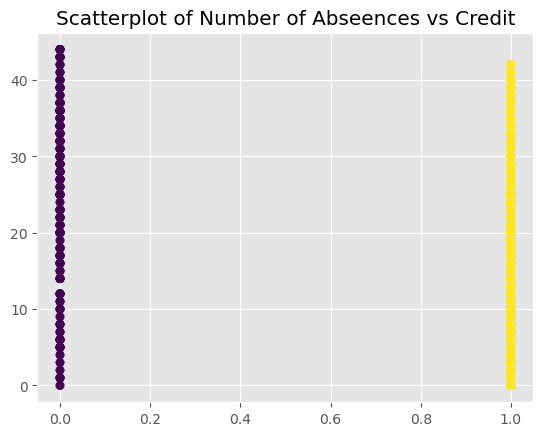

In [74]:
x = me['C/NC']
y = me['Abs1']

plt.scatter(x,y, c=x)
plt.title( 'Scatterplot of Number of Abseences vs Credit')
plt.show();

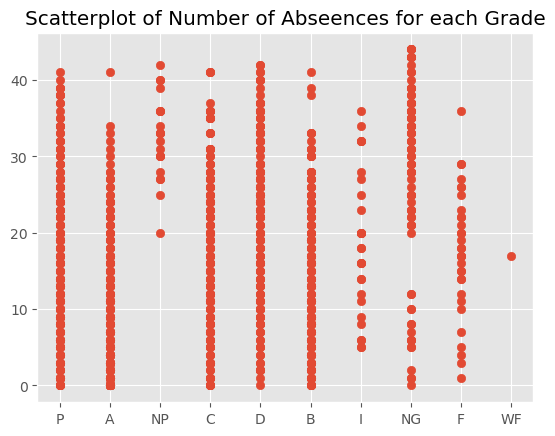

In [75]:
x = me['Grade']
y = me['Abs1']

plt.scatter(x,y)
plt.title( 'Scatterplot of Number of Abseences for each Grade')
plt.show();

In [76]:
abcdf = me[me['Grade'].isin(['A','B','C','D','F'])]

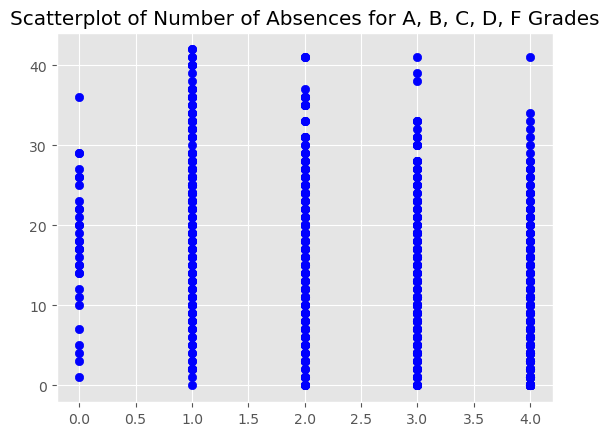

In [77]:
x = abcdf['GPA']
y = abcdf['Abs1']

plt.scatter(x,y, c='b')
plt.title( 'Scatterplot of Number of Absences for A, B, C, D, F Grades')
plt.show();

In [78]:
grade_group = me.groupby('Grade')['Abs1']

print(grade_group.mean())

Grade
A      8.837143
B     12.865248
C     16.661017
D     22.387500
F     17.468750
I     18.678571
NG    28.388889
NP    32.476190
P     14.865625
WF    17.000000
Name: Abs1, dtype: float64


In [79]:
group = pd.DataFrame(grade_group.mean())
group

,Abs1
Grade,
A,8.837143
B,12.865248
C,16.661017
D,22.387500
F,17.468750
I,18.678571
NG,28.388889
NP,32.476190
P,14.865625


In [80]:
abcd = group.iloc[0:4]
nps=group.iloc[6:7]

In [81]:
absent_days = pd.concat([abcd, nps])
absent_days

,Abs1
Grade,
A,8.837143
B,12.865248
C,16.661017
D,22.387500
NG,28.388889


Text(0, 0.5, 'Days Absent')

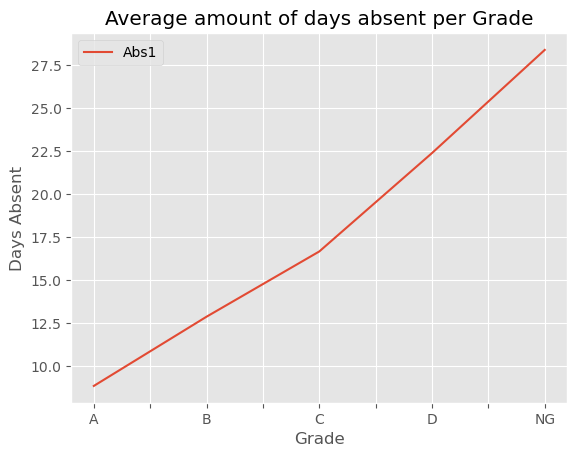

In [82]:
absent_days.plot()
plt.title('Average amount of days absent per Grade')
plt.ylabel('Days Absent')

Ok, the scatter plot wasn't doing me too many favors as it looked above, but this list is really doing me some favors. It looks like it's actually harder to get a F than it is to get a D in my classes. But i want to do a deeper dive into this.

For now, it's time to look at some features correlations. 

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_45798/1034082532.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(me.corr());


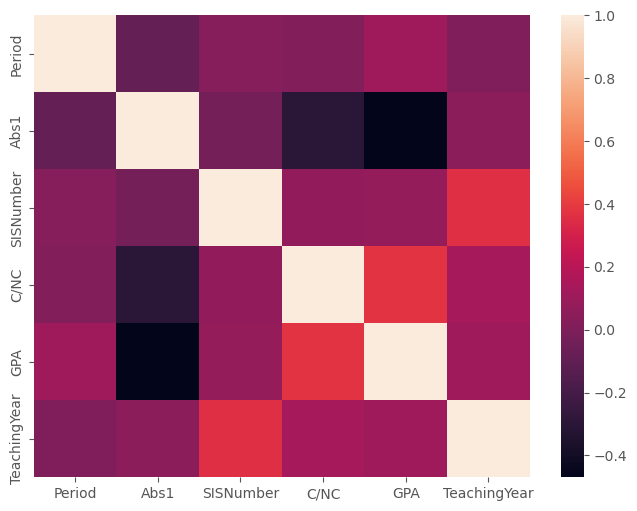

In [83]:
#Heat map of feature correlation
plt.subplots(figsize=(8,6))
sns.heatmap(me.corr());

This is good, but I still need to one-hot encode race and zip code.

In [84]:
me['M/NM']=pd.to_numeric(me['M/NM'])
me.dtypes

Course Title     object
TermCode         object
Period            int64
Teacher          object
Abs1              int64
SISNumber         int64
Grade            object
SchoolYear       object
Race             object
Zip              object
C/NC              int64
GPA             float64
TeachingYear      int64
M/NM              int64
dtype: object

In [85]:
me['Zip'].unique()

array(['97206', '97266', '97217', '97203', '97211', '97220', '97294',
       '97202', '97282-0894', '97215', '97213', '97206-9137',
       '97211-4117', '97214', '97206-8974', '97216', '97206-1869',
       '97013', '97233-2878', '97201', '97220-5681', '97236', '97233',
       '97212', '97266-3088', '97203-5803', '97206-6620', '97211-4570',
       '97030', '97202-3697', '97240', '97206-5958', '97206-5324',
       '97266-4468', '97220-1935', '97206-1382', '97206-5885', '97239',
       '97219', '97206-3055', '97005', '97216-1325', '97206-1508',
       '97222', '97086', '97206-9012', '97266-4432', '97208-2662',
       '97290', '97067', '52145', '97209', '97286', '97266-5463',
       '97206-6554', '97232', '97266-6276', '97266-5553', '97218',
       '97206-3435', '97206-6248', '97206-4643', '97223', '97267',
       '97027', '97266-3725', '97015', '97206-1637', '97202-4064'],
      dtype=object)

In [86]:
def change_zip(zip):
    if zip == '97282-0894':
        return '97282'
    elif zip == '97206-9137':
        return '97206'
    elif zip == '97211-4117':
        return '97211'
    elif zip == '97206-8974':
        return '97206'
    elif zip == '97206-1869':
        return '97206'
    elif zip == '97233-2878':
        return '97233'
    elif zip == '97220-5681':
        return '97220'
    elif zip == '97266-3088':
        return '97266'
    elif zip == '97203-5803':
        return '97203'
    elif zip == '97206-6620':
        return '97206'
    elif zip == '97211-4570':
        return '97211'
    elif zip == '97202-3697':
        return '97202'
    elif zip == '97206-5958':
        return '97206'
    elif zip == '97206-5324':
        return '97206'
    elif zip == '97206-3055':
        return '97206'
    elif zip == '97216-1325':
        return '97216'
    elif zip == '97206-1508':
        return '97206'
    elif zip == '97206-9012':
        return '97206'
    elif zip == '97266-4432':
        return '97266'
    elif zip == '97208-2662':
        return '97208'
    elif zip == '97266-5463':
        return '97266'
    elif zip == '97206-6554':
        return '97206'
    elif zip == '97266-6276':
        return '97266'
    elif zip == '97266-5553':
        return '97266'
    elif zip == '97206-3435':
        return '97206'
    elif zip == '97206-6248':
        return '97206'
    elif zip == '97206-4643':
        return '97206'
    elif zip == '97266-3725':
        return '97266'
    elif zip == '97206-1637':
        return '97206'
    elif zip == '97202-4064':
        return '97202'
    elif zip == '97266-4468':
        return '97266'
    elif zip == '97220-1935':
        return '97220'
    elif zip == '97206-1382':
        return '97206'
    elif zip == '97206-5885':
        return '97206'
    else:
        return zip
    

In [87]:
me['Zip'] = me['Zip'].apply(change_zip)

In [88]:
me['Zip'].unique()

array(['97206', '97266', '97217', '97203', '97211', '97220', '97294',
       '97202', '97282', '97215', '97213', '97214', '97216', '97013',
       '97233', '97201', '97236', '97212', '97030', '97240', '97239',
       '97219', '97005', '97222', '97086', '97208', '97290', '97067',
       '52145', '97209', '97286', '97232', '97218', '97223', '97267',
       '97027', '97015'], dtype=object)

Before I make dummies, I need to merge on zips for a few different datasets that in the past, I implemented later, but I am changing the order now.

In [89]:
income = pd.read_csv('/Users/mattnelson/Desktop/GitHub/Teacher/Quarter Days - Median Income.csv')
income=income.drop(columns='https://data.census.gov/table/ACSST5Y2021.S1903?=median%20income&g=860XX00US97266,97267', axis=1)
income['zipcode'] = income['zipcode'].apply(str)

In [92]:
me

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,Race,Zip,C/NC,GPA,TeachingYear,M/NM
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,2021-2022,White,97206,1,NaN,3,0
1,Zines B,Q2,5,"Nelson, Matthew",16,717118,A,2021-2022,White,97206,1,4.0,3,0
2,Advisory,Q2,1,"Nelson, Matthew",25,717118,NP,2022-2023,White,97206,0,NaN,4,0
3,G: Analytical Geometry Q2,Q2,4,"Nelson, Matthew",26,717118,C,2022-2023,White,97206,1,2.0,4,1
4,Advisory,Q2,1,"Nelson, Matthew",13,717118,P,2019-2020,White,97206,1,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,LA: Creative Writing,Q4,2,"Nelson, Matthew",8,763303,A,2022-2023,White,97266,1,4.0,4,0
1596,LA: Creative Writing,Q4,2,"Nelson, Matthew",20,724127,B,2022-2023,Two or More,97202,1,3.0,4,0
1597,H: Periodic Functions/Matrices Q4,Q4,4,"Nelson, Matthew",8,781342,A,2022-2023,White,97266,1,4.0,4,1
1598,H: Periodic Functions/Matrices Q4,Q4,7,"Nelson, Matthew",4,809530,A,2022-2023,Black/African American,97219,1,4.0,4,1


In [94]:
#I seem to be losing data here...figured it out. I need an outer join.

me = pd.merge(me, income, left_on='Zip', right_on='zipcode', how='outer')
me

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,Race,Zip,C/NC,GPA,TeachingYear,M/NM,zipcode,median_income
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,2021-2022,White,97206,1,NaN,3,0,97206,77133.0
1,Zines B,Q2,5,"Nelson, Matthew",16,717118,A,2021-2022,White,97206,1,4.0,3,0,97206,77133.0
2,Advisory,Q2,1,"Nelson, Matthew",25,717118,NP,2022-2023,White,97206,0,NaN,4,0,97206,77133.0
3,G: Analytical Geometry Q2,Q2,4,"Nelson, Matthew",26,717118,C,2022-2023,White,97206,1,2.0,4,1,97206,77133.0
4,Advisory,Q2,1,"Nelson, Matthew",13,717118,P,2019-2020,White,97206,1,NaN,1,0,97206,77133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Zines A,Q3,5,"Nelson, Matthew",6,803417,B,2021-2022,Hispanic,97267,1,3.0,3,0,97267,73575.0
1596,Personal Growth/Life Skills,Q4,7,"Nelson, Matthew",18,693823,A,2020-2021,White,97027,1,4.0,2,0,97027,86013.0
1597,B: Prob & Statistics,Q3,3,"Nelson, Matthew",19,693823,A,2020-2021,White,97027,1,4.0,2,1,97027,86013.0
1598,B: Prob & Statistics,Q3,3,"Nelson, Matthew",19,693823,A,2020-2021,White,97027,1,4.0,2,1,97027,86013.0


In [95]:
me = me.drop(columns=['zipcode'])
me

,Course Title,TermCode,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,Race,Zip,C/NC,GPA,TeachingYear,M/NM,median_income
0,Advisory,Q2,1,"Nelson, Matthew",17,717118,P,2021-2022,White,97206,1,NaN,3,0,77133.0
1,Zines B,Q2,5,"Nelson, Matthew",16,717118,A,2021-2022,White,97206,1,4.0,3,0,77133.0
2,Advisory,Q2,1,"Nelson, Matthew",25,717118,NP,2022-2023,White,97206,0,NaN,4,0,77133.0
3,G: Analytical Geometry Q2,Q2,4,"Nelson, Matthew",26,717118,C,2022-2023,White,97206,1,2.0,4,1,77133.0
4,Advisory,Q2,1,"Nelson, Matthew",13,717118,P,2019-2020,White,97206,1,NaN,1,0,77133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Zines A,Q3,5,"Nelson, Matthew",6,803417,B,2021-2022,Hispanic,97267,1,3.0,3,0,73575.0
1596,Personal Growth/Life Skills,Q4,7,"Nelson, Matthew",18,693823,A,2020-2021,White,97027,1,4.0,2,0,86013.0
1597,B: Prob & Statistics,Q3,3,"Nelson, Matthew",19,693823,A,2020-2021,White,97027,1,4.0,2,1,86013.0
1598,B: Prob & Statistics,Q3,3,"Nelson, Matthew",19,693823,A,2020-2021,White,97027,1,4.0,2,1,86013.0


In [96]:
#I want to merge a dataframe I made with the amount of days in each quarter so that I can find the ratio
#of days missed for the right quarter based on how many total days were in that quarter.

#I have to make things a little easier for myself though with cleaning the code here

me = pd.concat([me, me['TermCode'].str.split('Q', expand=True)], axis=1).drop('TermCode', axis=1)
me = me.drop(columns=[0], axis=1)
me = me.rename(columns={1:'Quarter'})
me['Quarter'] = pd.to_numeric(me['Quarter'])
me

,Course Title,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,Race,Zip,C/NC,GPA,TeachingYear,M/NM,median_income,Quarter
0,Advisory,1,"Nelson, Matthew",17,717118,P,2021-2022,White,97206,1,NaN,3,0,77133.0,2
1,Zines B,5,"Nelson, Matthew",16,717118,A,2021-2022,White,97206,1,4.0,3,0,77133.0,2
2,Advisory,1,"Nelson, Matthew",25,717118,NP,2022-2023,White,97206,0,NaN,4,0,77133.0,2
3,G: Analytical Geometry Q2,4,"Nelson, Matthew",26,717118,C,2022-2023,White,97206,1,2.0,4,1,77133.0,2
4,Advisory,1,"Nelson, Matthew",13,717118,P,2019-2020,White,97206,1,NaN,1,0,77133.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Zines A,5,"Nelson, Matthew",6,803417,B,2021-2022,Hispanic,97267,1,3.0,3,0,73575.0,3
1596,Personal Growth/Life Skills,7,"Nelson, Matthew",18,693823,A,2020-2021,White,97027,1,4.0,2,0,86013.0,4
1597,B: Prob & Statistics,3,"Nelson, Matthew",19,693823,A,2020-2021,White,97027,1,4.0,2,1,86013.0,3
1598,B: Prob & Statistics,3,"Nelson, Matthew",19,693823,A,2020-2021,White,97027,1,4.0,2,1,86013.0,3


In [97]:
#Reading in the total quarter days csv
days = pd.read_csv('/Users/mattnelson/Desktop/GitHub/Teacher/Quarter Days - Days.csv')

#The merging it
me = pd.merge(me, days, left_on=['SchoolYear', 'Quarter'], right_on=['Year', 'Quarter '], how='left')

#Create a new column that has is the percent a student was absent
me['absent_ratio'] = me['Abs1']/me['Days']

me = me.drop(columns=['Year', 'Quarter'])
me

,Course Title,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,Race,Zip,C/NC,GPA,TeachingYear,M/NM,median_income,Quarter,Days,absent_ratio
0,Advisory,1,"Nelson, Matthew",17,717118,P,2021-2022,White,97206,1,NaN,3,0,77133.0,2,40,0.425000
1,Zines B,5,"Nelson, Matthew",16,717118,A,2021-2022,White,97206,1,4.0,3,0,77133.0,2,40,0.400000
2,Advisory,1,"Nelson, Matthew",25,717118,NP,2022-2023,White,97206,0,NaN,4,0,77133.0,2,44,0.568182
3,G: Analytical Geometry Q2,4,"Nelson, Matthew",26,717118,C,2022-2023,White,97206,1,2.0,4,1,77133.0,2,44,0.590909
4,Advisory,1,"Nelson, Matthew",13,717118,P,2019-2020,White,97206,1,NaN,1,0,77133.0,2,41,0.317073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Zines A,5,"Nelson, Matthew",6,803417,B,2021-2022,Hispanic,97267,1,3.0,3,0,73575.0,3,41,0.146341
1596,Personal Growth/Life Skills,7,"Nelson, Matthew",18,693823,A,2020-2021,White,97027,1,4.0,2,0,86013.0,4,43,0.418605
1597,B: Prob & Statistics,3,"Nelson, Matthew",19,693823,A,2020-2021,White,97027,1,4.0,2,1,86013.0,3,41,0.463415
1598,B: Prob & Statistics,3,"Nelson, Matthew",19,693823,A,2020-2021,White,97027,1,4.0,2,1,86013.0,3,41,0.463415


In [99]:
grade_group_ratio = me.groupby('Grade')['absent_ratio']
group2 = pd.DataFrame(grade_group_ratio.mean())
group2

,absent_ratio
Grade,
A,0.207878
B,0.302420
C,0.388931
D,0.522646
F,0.420783
I,0.455575
NG,0.668573
NP,0.774669
P,0.350693


Text(0, 0.5, 'Days Absent')

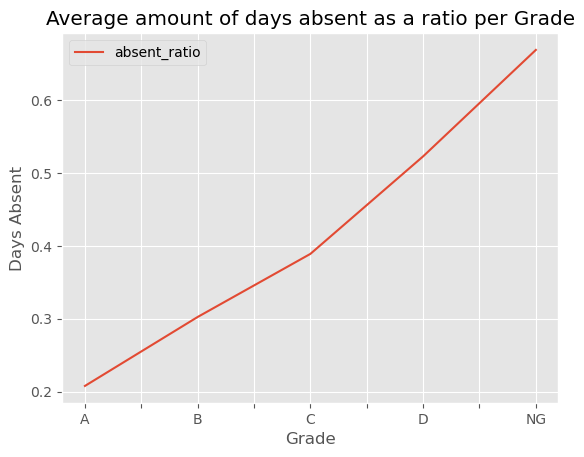

In [101]:
abcd2 = group2.iloc[0:4]
nps2=group2.iloc[6:7]
absent_ratio = pd.concat([abcd2, nps2])
absent_ratio.plot()
plt.title('Average amount of days absent as a ratio per Grade')
plt.ylabel('Days Absent Ratio')

In [102]:
me=pd.get_dummies(me,columns=['Race'], prefix='Race')
me=pd.get_dummies(me,columns=['Zip'], prefix='Zip')

/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_45798/1806938834.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(me.corr());


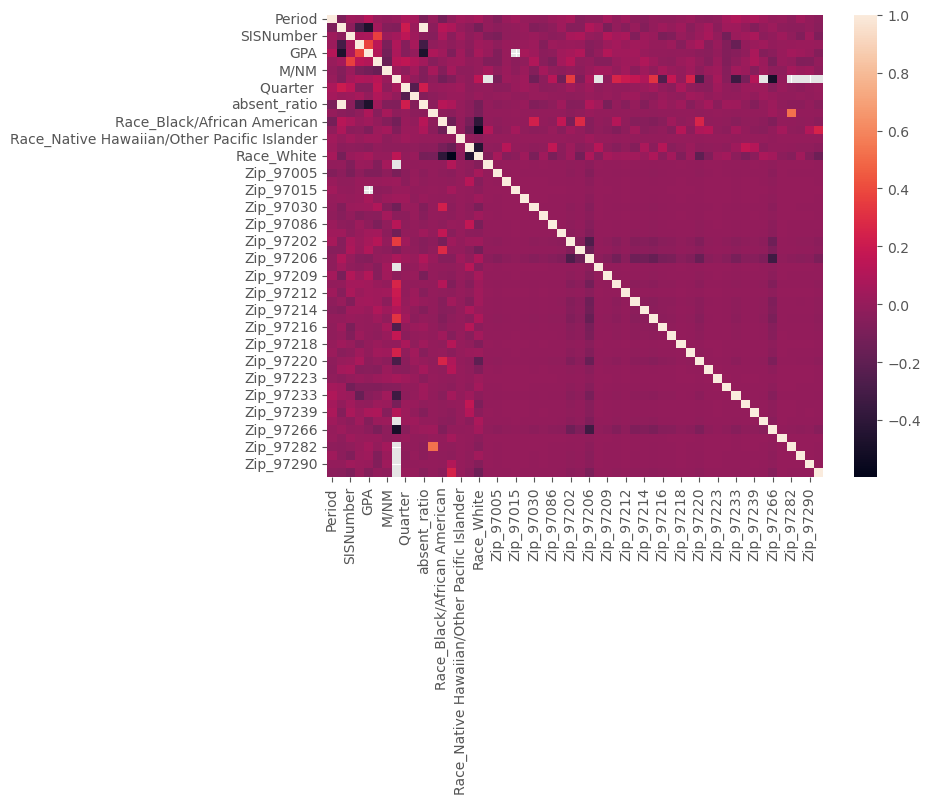

In [103]:
plt.subplots(figsize=(8,6))
sns.heatmap(me.corr());

In [104]:
me.columns

Index(['Course Title', 'Period', 'Teacher', 'Abs1', 'SISNumber', 'Grade',
       'SchoolYear', 'C/NC', 'GPA', 'TeachingYear', 'M/NM', 'median_income',
       'Quarter ', 'Days', 'absent_ratio', 'Race_Asian',
       'Race_Black/African American', 'Race_Hispanic',
       'Race_Native Hawaiian/Other Pacific Islander', 'Race_Two or More',
       'Race_White', 'Zip_52145', 'Zip_97005', 'Zip_97013', 'Zip_97015',
       'Zip_97027', 'Zip_97030', 'Zip_97067', 'Zip_97086', 'Zip_97201',
       'Zip_97202', 'Zip_97203', 'Zip_97206', 'Zip_97208', 'Zip_97209',
       'Zip_97211', 'Zip_97212', 'Zip_97213', 'Zip_97214', 'Zip_97215',
       'Zip_97216', 'Zip_97217', 'Zip_97218', 'Zip_97219', 'Zip_97220',
       'Zip_97222', 'Zip_97223', 'Zip_97232', 'Zip_97233', 'Zip_97236',
       'Zip_97239', 'Zip_97240', 'Zip_97266', 'Zip_97267', 'Zip_97282',
       'Zip_97286', 'Zip_97290', 'Zip_97294'],
      dtype='object')

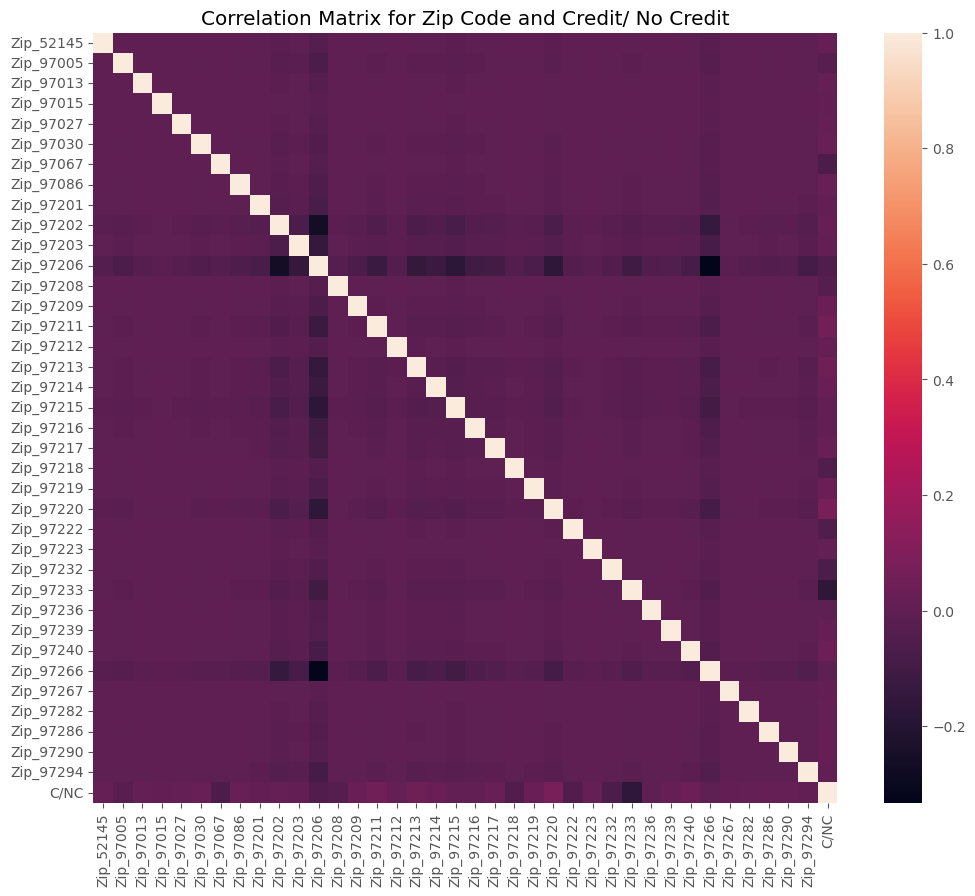

In [105]:
zip_columns = [col for col in me.columns if col.startswith('Zip_')]


additional_column = 'C/NC'
subset_data = me[zip_columns + [additional_column]]

# Compute the correlation matrix for the subset
correlation_matrix_subset = subset_data.corr()

# Create a heatmap with annotations for the subset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_subset)
plt.title('Correlation Matrix for Zip Code and Credit/ No Credit')
plt.show()

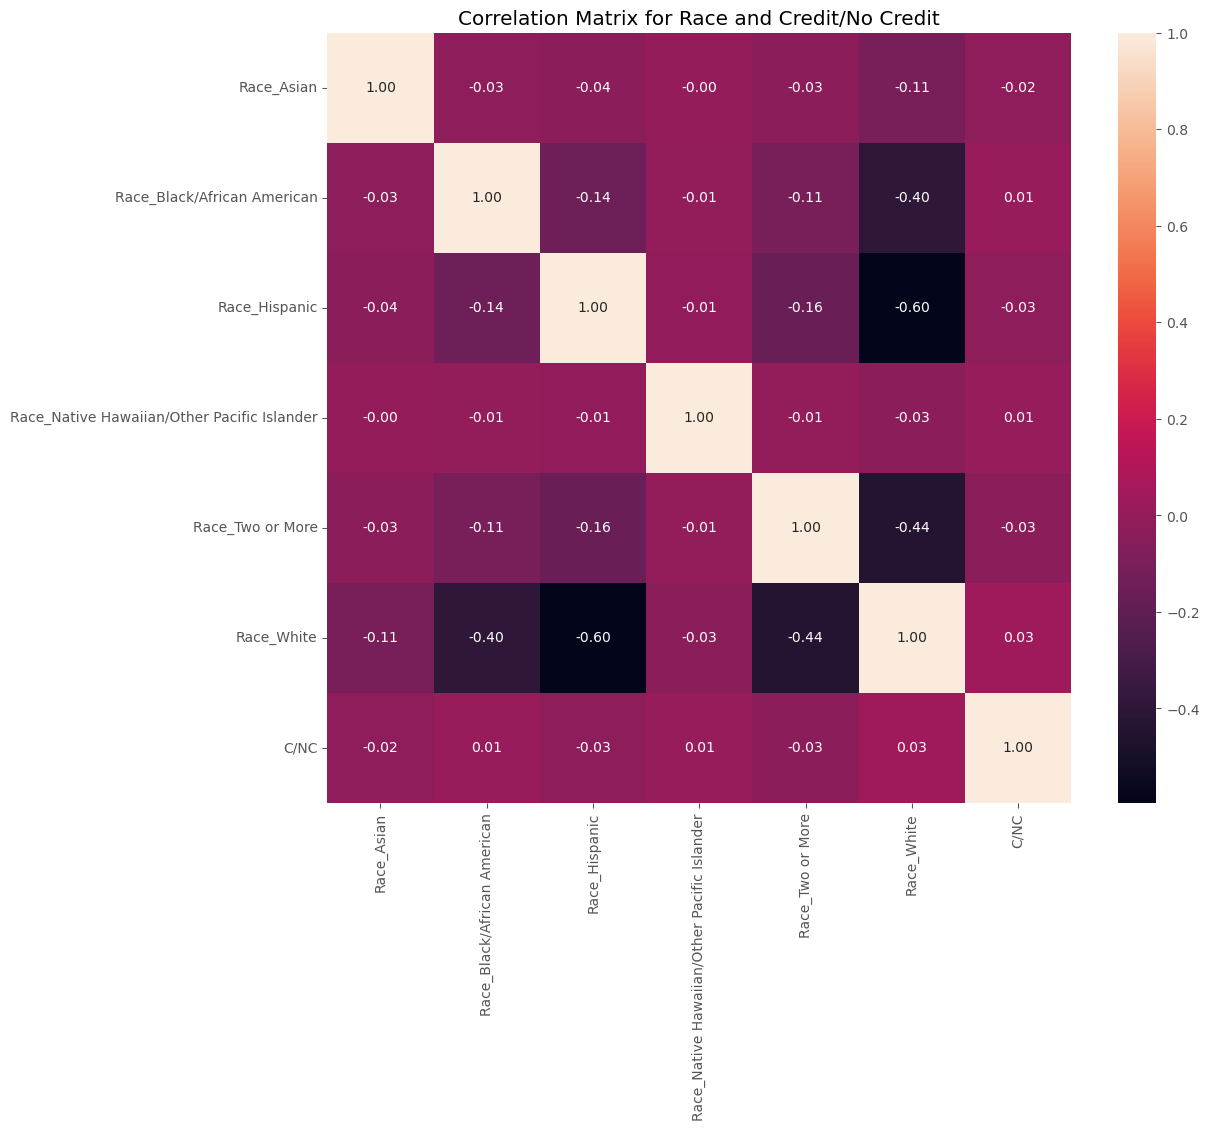

In [106]:
race_columns = [col for col in me.columns if col.startswith('Race_')]


additional_column = 'C/NC'
subset_data = me[race_columns + [additional_column]]

# Compute the correlation matrix for the subset
correlation_matrix_subset = subset_data.corr()

# Create a heatmap with annotations for the subset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_subset, annot=True, fmt='.2f')
plt.title('Correlation Matrix for Race and Credit/No Credit')
plt.show()

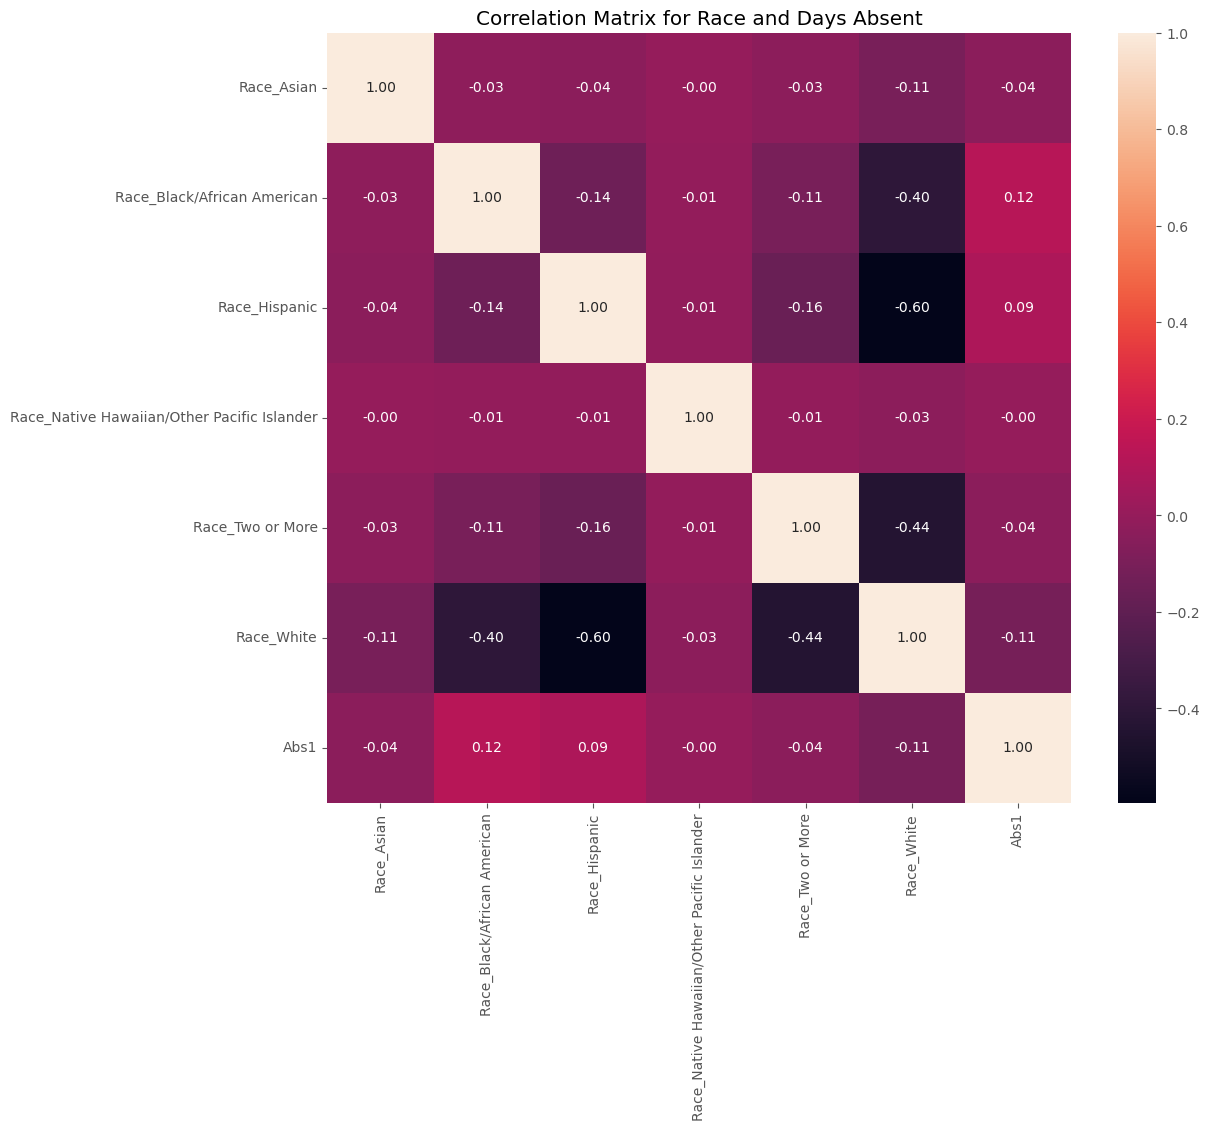

In [107]:
race_columns = [col for col in me.columns if col.startswith('Race_')]


additional_column = 'Abs1'
subset_data = me[race_columns + [additional_column]]

# Compute the correlation matrix for the subset
correlation_matrix_subset = subset_data.corr()

# Create a heatmap with annotations for the subset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_subset, annot=True, fmt='.2f')
plt.title('Correlation Matrix for Race and Days Absent')
plt.show()

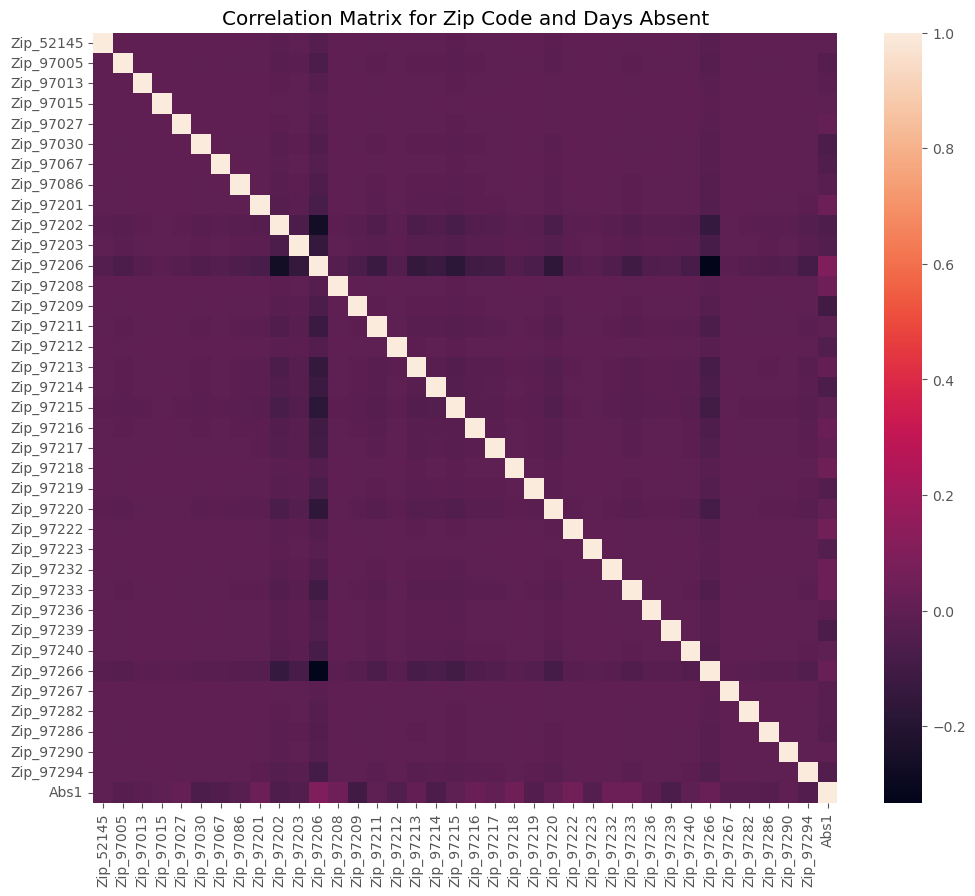

In [108]:
zip_columns = [col for col in me.columns if col.startswith('Zip_')]


additional_column = 'Abs1'
subset_data = me[zip_columns + [additional_column]]

# Compute the correlation matrix for the subset
correlation_matrix_subset = subset_data.corr()

# Create a heatmap with annotations for the subset
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_subset)
plt.title('Correlation Matrix for Zip Code and Days Absent')
plt.show()

In [109]:
teaching_year = me.groupby(['TeachingYear'])['Grade'].value_counts()
teaching_year

TeachingYear  Grade
1             P        140
              A         70
              B         49
              C         38
              F         32
              I         28
              D         22
              NG        11
              NP         3
              WF         1
2             D         93
              A         77
              P         74
              B         72
              C         66
              NG        40
              NP         3
3             B         93
              A         90
              C         73
              D         67
              P         59
              NG        23
              NP         2
4             A        113
              B         68
              C         59
              D         58
              P         47
              NG        16
              NP        13
Name: Grade, dtype: int64

In [110]:
teaching_year1 = me.groupby(['TeachingYear', 'Grade']).size().reset_index(name='Count')
teaching_year1

,TeachingYear,Grade,Count
0,1,A,70
1,1,B,49
2,1,C,38
3,1,D,22
4,1,F,32
5,1,I,28
6,1,NG,11
7,1,NP,3
8,1,P,140
9,1,WF,1


In [111]:
pivot_table = teaching_year1.pivot(index='TeachingYear', columns='Grade', values='Count').fillna(0)

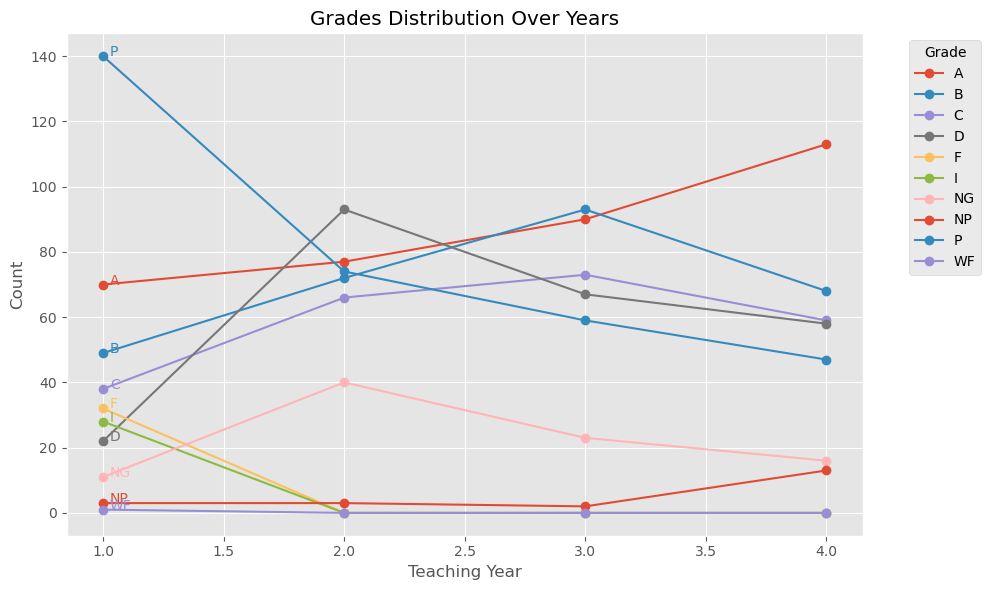

In [112]:
plt.figure(figsize=(10, 6))
for grade in pivot_table.columns:
    line=plt.plot(pivot_table.index, pivot_table[grade], label=grade, marker='o')
    plt.annotate(grade, xy=(pivot_table.index[0], pivot_table[grade].iloc[0]),
                 xytext=(5,0), textcoords='offset points', color=line[0].get_color())
plt.title('Grades Distribution Over Years')
plt.xlabel('Teaching Year')
plt.ylabel('Count')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [113]:
me.columns

Index(['Course Title', 'Period', 'Teacher', 'Abs1', 'SISNumber', 'Grade',
       'SchoolYear', 'C/NC', 'GPA', 'TeachingYear', 'M/NM', 'median_income',
       'Quarter ', 'Days', 'absent_ratio', 'Race_Asian',
       'Race_Black/African American', 'Race_Hispanic',
       'Race_Native Hawaiian/Other Pacific Islander', 'Race_Two or More',
       'Race_White', 'Zip_52145', 'Zip_97005', 'Zip_97013', 'Zip_97015',
       'Zip_97027', 'Zip_97030', 'Zip_97067', 'Zip_97086', 'Zip_97201',
       'Zip_97202', 'Zip_97203', 'Zip_97206', 'Zip_97208', 'Zip_97209',
       'Zip_97211', 'Zip_97212', 'Zip_97213', 'Zip_97214', 'Zip_97215',
       'Zip_97216', 'Zip_97217', 'Zip_97218', 'Zip_97219', 'Zip_97220',
       'Zip_97222', 'Zip_97223', 'Zip_97232', 'Zip_97233', 'Zip_97236',
       'Zip_97239', 'Zip_97240', 'Zip_97266', 'Zip_97267', 'Zip_97282',
       'Zip_97286', 'Zip_97290', 'Zip_97294'],
      dtype='object')

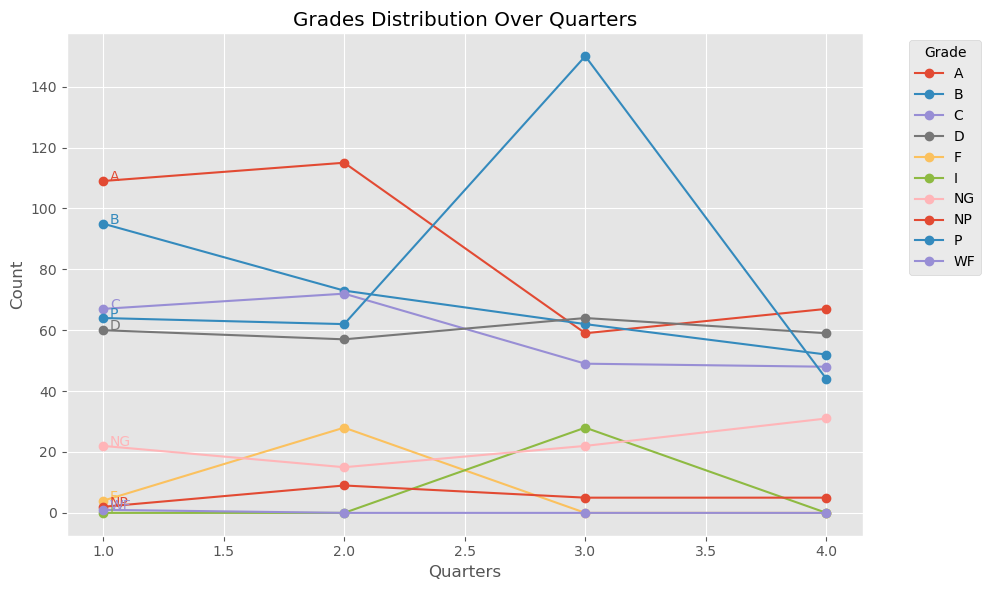

In [118]:
quarter = me.groupby(['Quarter ', 'Grade']).size().reset_index(name='Count')
pivot_table2 = quarter.pivot(index='Quarter ', columns='Grade', values='Count').fillna(0)
plt.figure(figsize=(10, 6))
for grade in pivot_table2.columns:
    line=plt.plot(pivot_table2.index, pivot_table2[grade], label=grade, marker='o')
    plt.annotate(grade, xy=(pivot_table2.index[0], pivot_table2[grade].iloc[0]),
                 xytext=(5,0), textcoords='offset points', color=line[0].get_color())
plt.title('Grades Distribution Over Quarters')
plt.xlabel('Quarters')
plt.ylabel('Count')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

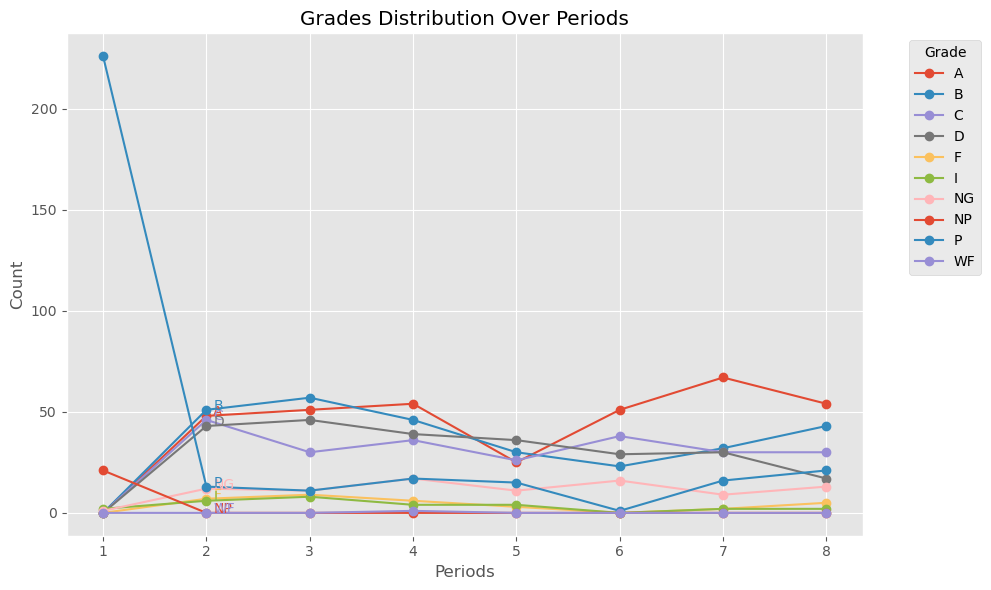

In [119]:
period = me.groupby(['Period', 'Grade']).size().reset_index(name='Count')
pivot_table3 = period.pivot(index='Period', columns='Grade', values='Count').fillna(0)
plt.figure(figsize=(10, 6))
for grade in pivot_table3.columns:
    line=plt.plot(pivot_table3.index, pivot_table3[grade], label=grade, marker='o')
    plt.annotate(grade, xy=(pivot_table3.index[1], pivot_table3[grade].iloc[1]),
                 xytext=(5,0), textcoords='offset points', color=line[0].get_color())
plt.title('Grades Distribution Over Periods')
plt.xlabel('Periods')
plt.ylabel('Count')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

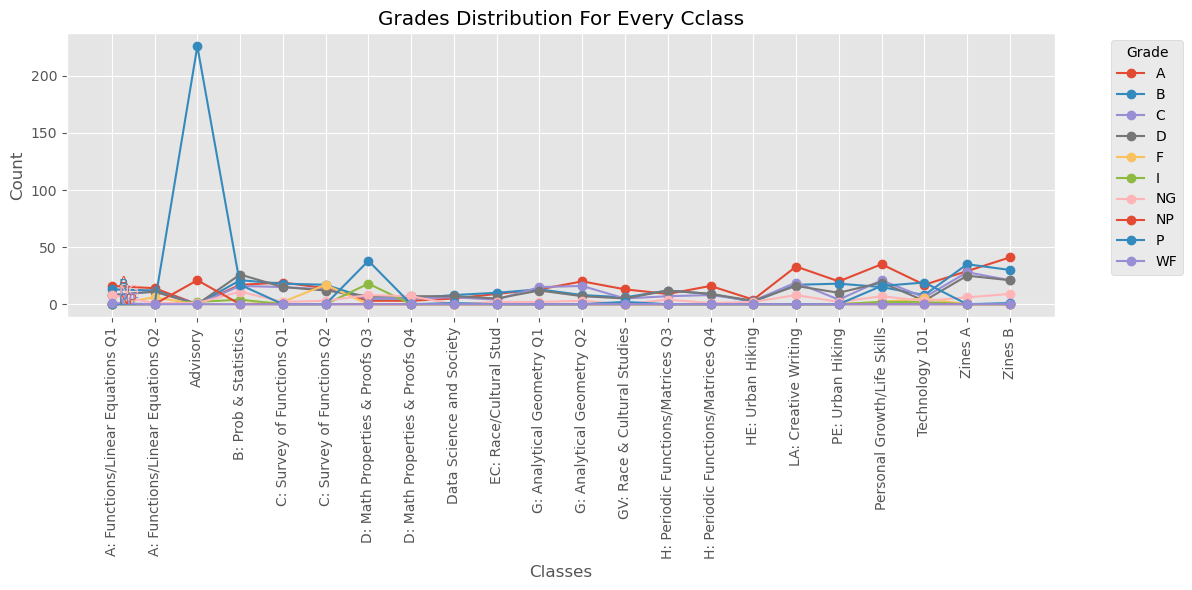

In [120]:
classes = me.groupby(['Course Title', 'Grade']).size().reset_index(name='Count')
pivot_table5 = classes.pivot(index='Course Title', columns='Grade', values='Count').fillna(0)
plt.figure(figsize=(12, 6))
for grade in pivot_table5.columns:
    line=plt.plot(pivot_table5.index, pivot_table5[grade], label=grade, marker='o')
    plt.annotate(grade, xy=(pivot_table5.index[0], pivot_table5[grade].iloc[0]),
                 xytext=(5,0), textcoords='offset points', color=line[0].get_color())
plt.title('Grades Distribution For Every Cclass')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

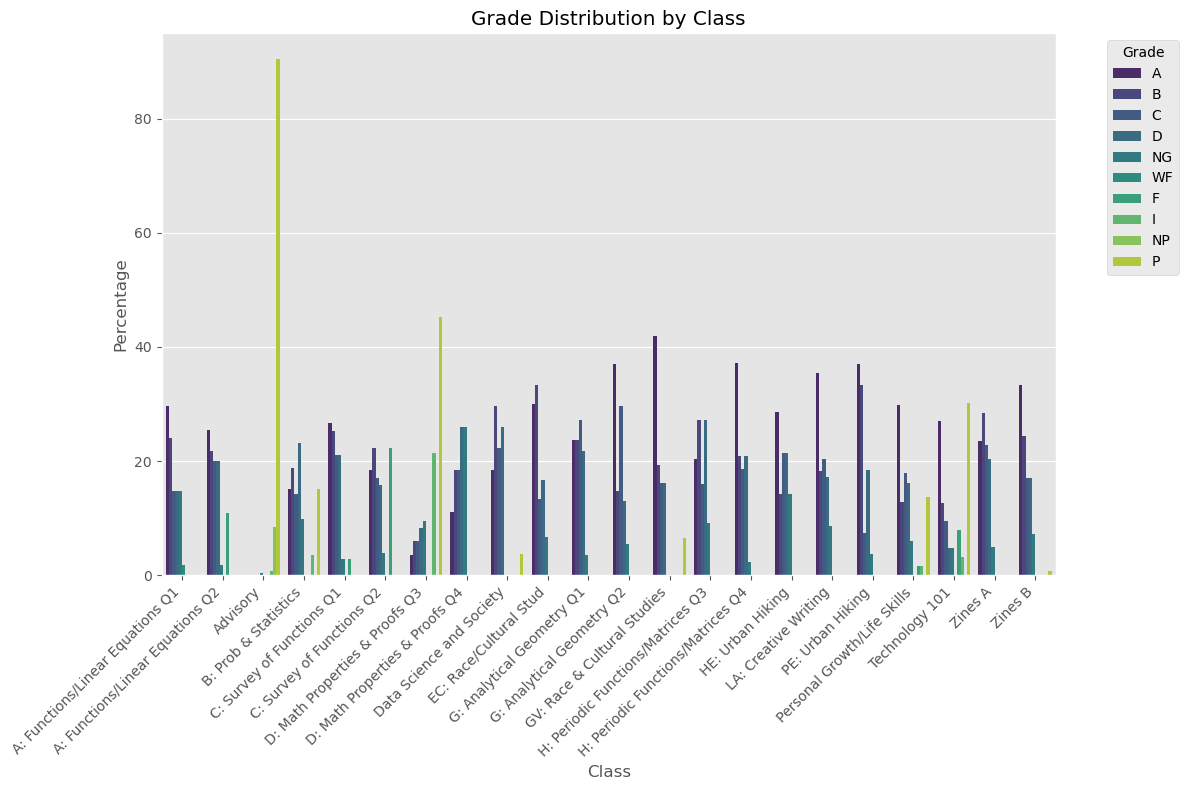

In [121]:
class_grade_counts = me.groupby(['Course Title', 'Grade']).size().reset_index(name='Count')

# Calculate the total count for each class
class_total_counts = class_grade_counts.groupby('Course Title')['Count'].sum()

# Calculate percentages
class_grade_counts['Percentage'] = (
    class_grade_counts['Count'] / class_grade_counts['Course Title'].map(class_total_counts) * 100
)

plt.figure(figsize=(12, 8))  

# Create a bar plot with percentages
sns.barplot(x='Course Title', y='Percentage', hue='Grade', data=class_grade_counts, palette='viridis')

plt.title('Grade Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis ticks for better readability
plt.tight_layout()
plt.show()

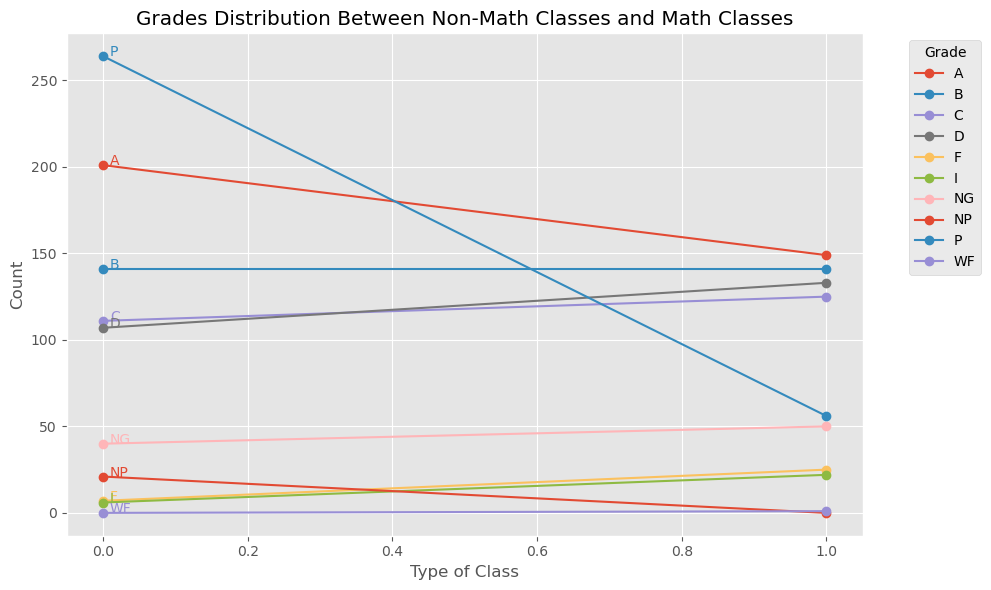

In [122]:
mathno = me.groupby(['M/NM', 'Grade']).size().reset_index(name='Count')
pivot_table4 = mathno.pivot(index='M/NM', columns='Grade', values='Count').fillna(0)
plt.figure(figsize=(10, 6))
for grade in pivot_table4.columns:
    line= plt.plot(pivot_table4.index, pivot_table4[grade], label=grade, marker='o')
    plt.annotate(grade, xy=(pivot_table4.index[0], pivot_table4[grade].iloc[0]),
                 xytext=(5,0), textcoords='offset points', color=line[0].get_color())
plt.title('Grades Distribution Between Non-Math Classes and Math Classes')
plt.xlabel('Type of Class')
plt.ylabel('Count')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

I feel like there's so much more to do, but one thing is for sure, the heat map by race for attendance is interesting. I still need to figure out with to do with the slew of gradings that account for not passing, as well as how a P for passing would relate within the A-F scale...

So I've gone back and gotten the whole gradebooks for each math class I've taught the past four years that include the percent grade instead of the letter grade. This will vastly improve my anaylsis because there were too many letter codes for various grades. For instance, for first period Advisory, students can either achieve a P for passing or NP for not passing. For the third quarter of 2019-2020 school year, students were given either Ps or Is (Incompletes), an artifact now of the Covid-19 quarantines. Started during distance learning, letter grades of Fs were no longer given in order to reduce impact of students' cumulative GPAs. NGs (No Grades) were introduced to show that studetns did not receive credit for a class but that failure would not impact cum GPAs. The problem is the range: Students could have anything from a 0% to a 59.9% and receive an NG or NP or I. 

With grade percentages added in, I now have a more accurate map of student outcomes.

In [233]:
#Importing the grade percentage csv created by hand from gradebooks for each class each quarter each year.

cent = pd.read_csv('/Users/mattnelson/Desktop/GitHub/Teacher/Grade:Student Info/Mine/Grade Percents - Sheet.csv')

#The column with the grades included both the percent and the letter grade so I need to split that column...

cents = pd.concat([cent, cent['Grade'].str.split(' ', expand=True)], axis=1).drop('Grade', axis=1)

#...and then drop the column with the letter grade.

cents = cents.drop([1,2], axis=1)

cents=cents.rename(columns={0:'Grade Percent'})

cents

,Student,Term,Year,Coure Title,Grade Percent
0,571944,Q1,2019-2020,C: Survey of Functions Q1,60.3
1,655807,Q1,2019-2020,C: Survey of Functions Q1,60.1
2,773644,Q1,2019-2020,C: Survey of Functions Q1,83.7
3,534468,Q1,2019-2020,C: Survey of Functions Q1,76.9
4,647010,Q1,2019-2020,C: Survey of Functions Q1,94.8
...,...,...,...,...,...
499,721571,Q4,2022-2023,H: Period Functions/Matrices Q4,94.3
500,711017,Q4,2022-2023,H: Period Functions/Matrices Q4,91.2
501,663094,Q4,2022-2023,H: Period Functions/Matrices Q4,80.4
502,828864,Q4,2022-2023,H: Period Functions/Matrices Q4,62.4


In [234]:
cents = pd.concat([cents, cents['Term'].str.split('Q', expand=True)], axis=1)
cents = cents.rename(columns={1: 'Quarter'})
cents['Quarter'] = pd.to_numeric(cents['Quarter'])
cents = cents.drop(columns=[0])
cents

,Student,Term,Year,Coure Title,Grade Percent,Quarter
0,571944,Q1,2019-2020,C: Survey of Functions Q1,60.3,1
1,655807,Q1,2019-2020,C: Survey of Functions Q1,60.1,1
2,773644,Q1,2019-2020,C: Survey of Functions Q1,83.7,1
3,534468,Q1,2019-2020,C: Survey of Functions Q1,76.9,1
4,647010,Q1,2019-2020,C: Survey of Functions Q1,94.8,1
...,...,...,...,...,...,...
499,721571,Q4,2022-2023,H: Period Functions/Matrices Q4,94.3,4
500,711017,Q4,2022-2023,H: Period Functions/Matrices Q4,91.2,4
501,663094,Q4,2022-2023,H: Period Functions/Matrices Q4,80.4,4
502,828864,Q4,2022-2023,H: Period Functions/Matrices Q4,62.4,4


In [235]:
cents = cents[['Student', 'Quarter', 'Year', 'Coure Title', 'Grade Percent']]

cents['Coure Title'] = cents['Coure Title'].str.replace('D: Math Properties and Proofs Q3','D: Math Properties & Proofs Q3')
cents['Coure Title'] = cents['Coure Title'].str.replace('D: Math Properties and Proofs Q4','D: Math Properties & Proofs Q4')
cents['Coure Title'] = cents['Coure Title'].str.replace('H: Period Functions/Matrices Q3','H: Periodic Functions/Matrices Q3')
cents['Coure Title'] = cents['Coure Title'].str.replace('H: Period Functions/Matrices Q4','H: Periodic Functions/Matrices Q4')



/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_45798/3200546664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cents['Coure Title'] = cents['Coure Title'].str.replace('D: Math Properties and Proofs Q3','D: Math Properties & Proofs Q3')
/var/folders/2s/11ldfx_j2c9237b89l98fmdr0000gn/T/ipykernel_45798/3200546664.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cents['Coure Title'] = cents['Coure Title'].str.replace('D: Math Properties and Proofs Q4','D: Math Properties & Proofs Q4')
/var/f

In [237]:
#Merging the old dataframe with this grade percent data frame...

new_df = pd.merge(cents, me, how='inner', left_on=['Student', 'Quarter', 'Year', 'Coure Title'], 
                  right_on=['SISNumber', 'Quarter ', 'SchoolYear',  'Course Title'])

#..and then deleting the duplicate columns

new_df=new_df.drop(columns={'Student', 'Quarter','Year', 'Coure Title'}, axis=1)



In [239]:
new_df

,Grade Percent,Course Title,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,C/NC,GPA,TeachingYear,M/NM,median_income,Quarter,Days,absent_ratio,Race_Asian,Race_Black/African American,Race_Hispanic,Race_Native Hawaiian/Other Pacific Islander,Race_Two or More,Race_White,Zip_52145,Zip_97005,Zip_97013,Zip_97015,Zip_97027,Zip_97030,Zip_97067,Zip_97086,Zip_97201,Zip_97202,Zip_97203,Zip_97206,Zip_97208,Zip_97209,Zip_97211,Zip_97212,Zip_97213,Zip_97214,Zip_97215,Zip_97216,Zip_97217,Zip_97218,Zip_97219,Zip_97220,Zip_97222,Zip_97223,Zip_97232,Zip_97233,Zip_97236,Zip_97239,Zip_97240,Zip_97266,Zip_97267,Zip_97282,Zip_97286,Zip_97290,Zip_97294
0,60.3,C: Survey of Functions Q1,2,"Nelson, Matthew",20,571944,D,2019-2020,1,1.0,1,1,63274.0,1,45,0.444444,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,60.1,C: Survey of Functions Q1,2,"Nelson, Matthew",10,655807,D,2019-2020,1,1.0,1,1,63274.0,1,45,0.222222,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,83.7,C: Survey of Functions Q1,2,"Nelson, Matthew",4,773644,B,2019-2020,1,3.0,1,1,91680.0,1,45,0.088889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,76.9,C: Survey of Functions Q1,2,"Nelson, Matthew",10,534468,C,2019-2020,1,2.0,1,1,55590.0,1,45,0.222222,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,94.8,C: Survey of Functions Q1,2,"Nelson, Matthew",15,647010,A,2019-2020,1,4.0,1,1,77133.0,1,45,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,94.3,H: Periodic Functions/Matrices Q4,7,"Nelson, Matthew",4,721571,A,2022-2023,1,4.0,4,1,71498.0,4,44,0.090909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
517,91.2,H: Periodic Functions/Matrices Q4,7,"Nelson, Matthew",14,711017,A,2022-2023,1,4.0,4,1,77133.0,4,44,0.318182,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
518,80.4,H: Periodic Functions/Matrices Q4,7,"Nelson, Matthew",17,663094,B,2022-2023,1,3.0,4,1,77133.0,4,44,0.386364,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
519,62.4,H: Periodic Functions/Matrices Q4,7,"Nelson, Matthew",26,828864,D,2022-2023,1,1.0,4,1,77133.0,4,44,0.590909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [244]:
math = new_df.drop_duplicates()
math = math.reset_index(drop=True)
math

In [248]:

math['Grade Percent']=pd.to_numeric(math['Grade Percent'])

In [249]:
math

,Grade Percent,Course Title,Period,Teacher,Abs1,SISNumber,Grade,SchoolYear,C/NC,GPA,TeachingYear,M/NM,median_income,Quarter,Days,absent_ratio,Race_Asian,Race_Black/African American,Race_Hispanic,Race_Native Hawaiian/Other Pacific Islander,Race_Two or More,Race_White,Zip_52145,Zip_97005,Zip_97013,Zip_97015,Zip_97027,Zip_97030,Zip_97067,Zip_97086,Zip_97201,Zip_97202,Zip_97203,Zip_97206,Zip_97208,Zip_97209,Zip_97211,Zip_97212,Zip_97213,Zip_97214,Zip_97215,Zip_97216,Zip_97217,Zip_97218,Zip_97219,Zip_97220,Zip_97222,Zip_97223,Zip_97232,Zip_97233,Zip_97236,Zip_97239,Zip_97240,Zip_97266,Zip_97267,Zip_97282,Zip_97286,Zip_97290,Zip_97294
0,60.3,C: Survey of Functions Q1,2,"Nelson, Matthew",20,571944,D,2019-2020,1,1.0,1,1,63274.0,1,45,0.444444,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,60.1,C: Survey of Functions Q1,2,"Nelson, Matthew",10,655807,D,2019-2020,1,1.0,1,1,63274.0,1,45,0.222222,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,83.7,C: Survey of Functions Q1,2,"Nelson, Matthew",4,773644,B,2019-2020,1,3.0,1,1,91680.0,1,45,0.088889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,76.9,C: Survey of Functions Q1,2,"Nelson, Matthew",10,534468,C,2019-2020,1,2.0,1,1,55590.0,1,45,0.222222,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,94.8,C: Survey of Functions Q1,2,"Nelson, Matthew",15,647010,A,2019-2020,1,4.0,1,1,77133.0,1,45,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,94.3,H: Periodic Functions/Matrices Q4,7,"Nelson, Matthew",4,721571,A,2022-2023,1,4.0,4,1,71498.0,4,44,0.090909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
500,91.2,H: Periodic Functions/Matrices Q4,7,"Nelson, Matthew",14,711017,A,2022-2023,1,4.0,4,1,77133.0,4,44,0.318182,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
501,80.4,H: Periodic Functions/Matrices Q4,7,"Nelson, Matthew",17,663094,B,2022-2023,1,3.0,4,1,77133.0,4,44,0.386364,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
502,62.4,H: Periodic Functions/Matrices Q4,7,"Nelson, Matthew",26,828864,D,2022-2023,1,1.0,4,1,77133.0,4,44,0.590909,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [250]:
math.dtypes

Grade Percent                                  float64
Course Title                                    object
Period                                           int64
Teacher                                         object
Abs1                                             int64
SISNumber                                        int64
Grade                                           object
SchoolYear                                      object
C/NC                                             int64
GPA                                            float64
TeachingYear                                     int64
M/NM                                             int64
median_income                                  float64
Quarter                                          int64
Days                                             int64
absent_ratio                                   float64
Race_Asian                                       uint8
Race_Black/African American                      uint8
Race_Hispa

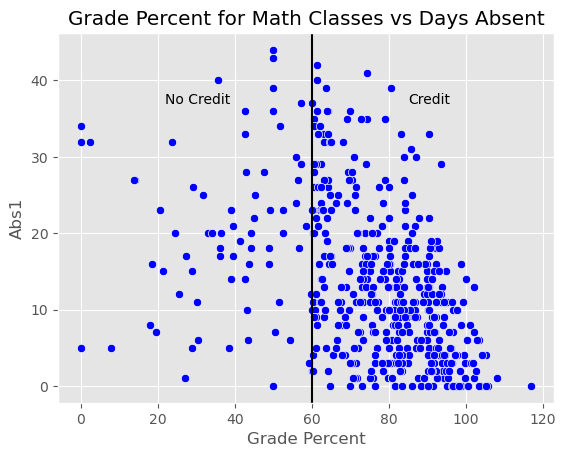

In [251]:
#Let's make a scatter plot of math grades as percents vs absent days

sns.scatterplot(data=math, x='Grade Percent', y='abset', color='b')
plt.axvline(60, 0,40, c='black', label='Credit Cutoff')
plt.text(22,37,'No Credit')
plt.text(85,37,'Credit')
plt.title('Grade Percent for Math Classes vs Days Absent');

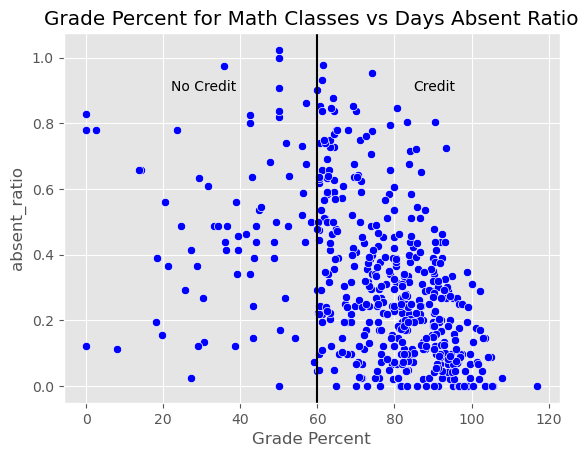

In [257]:
#Let's make a scatter plot of math grades as percents vs absent days ratio

sns.scatterplot(data=math, x='Grade Percent', y='absent_ratio', color='b')
plt.axvline(60, 0,40, c='black', label='Credit Cutoff')
plt.text(22,0.9,'No Credit')
plt.text(85,0.9,'Credit')
plt.title('Grade Percent for Math Classes vs Days Absent Ratio');

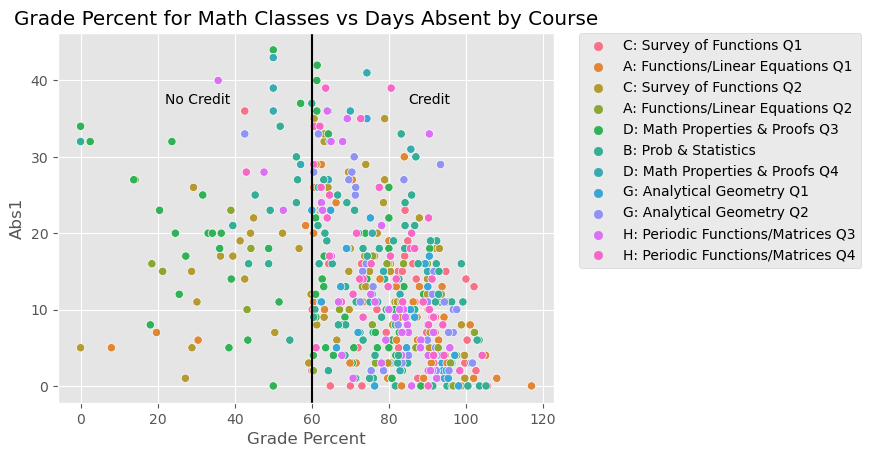

In [252]:
#Let's make a scatter plot of math grades as percents vs absent days by course

sns.scatterplot(data=math, x='Grade Percent', y='Abs1', hue='Course Title')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.axvline(60, 0,40, c='black')
plt.text(22,37,'No Credit')
plt.text(85,37,'Credit')
plt.title('Grade Percent for Math Classes vs Days Absent by Course');

In [ ]:
#Let's make a scatter plot of math grades as percents vs absent days by course

sns.scatterplot(data=math, x='Grade Percent', y='Abs1', hue='Course Title')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.axvline(60, 0,40, c='black')
plt.text(22,37,'No Credit')
plt.text(85,37,'Credit')
plt.title('Grade Percent for Math Classes vs Days Absent by Course');

This looks really good, but I want to see each class popped out from the rest of the spread to see if there's any trends

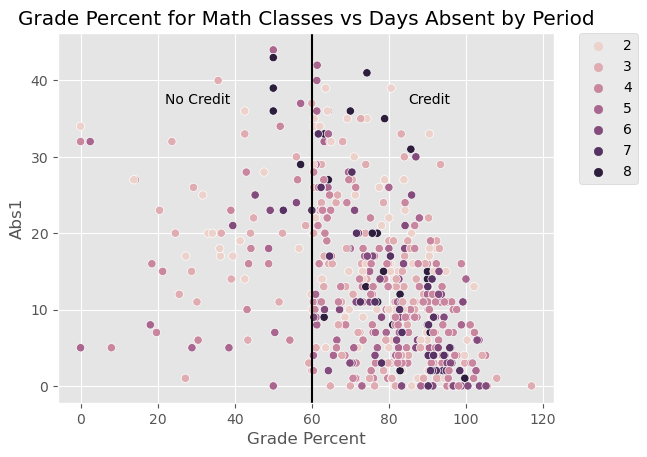

In [253]:
#Let's make a scatter plot of math grades as percents vs absent days by period

sns.scatterplot(data=math, x='Grade Percent', y='Abs1', hue='Period')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.axvline(60, 0,40, c='black')
plt.text(22,37,'No Credit')
plt.text(85,37,'Credit')
plt.title('Grade Percent for Math Classes vs Days Absent by Period');

My gut is to say that the earlier the class is, the more absences there are. Which definitely seem to affect grades. With all these graphs though, you do see more data points right of 60% which means more of my math studetns are passing versus failing. 

TIME TO MAKE A MAP!!!

In [258]:
me.columns

Index(['Course Title', 'Period', 'Teacher', 'Abs1', 'SISNumber', 'Grade',
       'SchoolYear', 'C/NC', 'GPA', 'TeachingYear', 'M/NM', 'median_income',
       'Quarter ', 'Days', 'absent_ratio', 'Race_Asian',
       'Race_Black/African American', 'Race_Hispanic',
       'Race_Native Hawaiian/Other Pacific Islander', 'Race_Two or More',
       'Race_White', 'Zip_52145', 'Zip_97005', 'Zip_97013', 'Zip_97015',
       'Zip_97027', 'Zip_97030', 'Zip_97067', 'Zip_97086', 'Zip_97201',
       'Zip_97202', 'Zip_97203', 'Zip_97206', 'Zip_97208', 'Zip_97209',
       'Zip_97211', 'Zip_97212', 'Zip_97213', 'Zip_97214', 'Zip_97215',
       'Zip_97216', 'Zip_97217', 'Zip_97218', 'Zip_97219', 'Zip_97220',
       'Zip_97222', 'Zip_97223', 'Zip_97232', 'Zip_97233', 'Zip_97236',
       'Zip_97239', 'Zip_97240', 'Zip_97266', 'Zip_97267', 'Zip_97282',
       'Zip_97286', 'Zip_97290', 'Zip_97294'],
      dtype='object')

In [259]:
zips = me.groupby('SISNumber')

In [260]:
zippy = ['Zip_52145', 'Zip_97005', 'Zip_97013', 'Zip_97015',
       'Zip_97027', 'Zip_97030', 'Zip_97067', 'Zip_97086', 'Zip_97201',
       'Zip_97202', 'Zip_97203', 'Zip_97206', 'Zip_97208', 'Zip_97209',
       'Zip_97211', 'Zip_97212', 'Zip_97213', 'Zip_97214', 'Zip_97215',
       'Zip_97216', 'Zip_97217', 'Zip_97218', 'Zip_97219', 'Zip_97220',
       'Zip_97222', 'Zip_97223', 'Zip_97232', 'Zip_97233', 'Zip_97236',
       'Zip_97239', 'Zip_97240', 'Zip_97266', 'Zip_97267', 'Zip_97282',
       'Zip_97286', 'Zip_97290', 'Zip_97294']

In [261]:
zipped = []
for zi in zippy:
    zz = me[me[zi]==1]['SISNumber'].nunique()
    zipped.append(zz)

In [262]:
zippy = pd.DataFrame(['Zip_52145', 'Zip_97005', 'Zip_97013', 'Zip_97015',
       'Zip_97027', 'Zip_97030', 'Zip_97067', 'Zip_97086', 'Zip_97201',
       'Zip_97202', 'Zip_97203', 'Zip_97206', 'Zip_97208', 'Zip_97209',
       'Zip_97211', 'Zip_97212', 'Zip_97213', 'Zip_97214', 'Zip_97215',
       'Zip_97216', 'Zip_97217', 'Zip_97218', 'Zip_97219', 'Zip_97220',
       'Zip_97222', 'Zip_97223', 'Zip_97232', 'Zip_97233', 'Zip_97236',
       'Zip_97239', 'Zip_97240', 'Zip_97266', 'Zip_97267', 'Zip_97282',
       'Zip_97286', 'Zip_97290', 'Zip_97294'])
zipped = pd.DataFrame(zipped)

In [263]:
zipped=zipped.rename(columns={1:'count'})
zippy = pd.concat([zippy, zippy[0].str.split('_', expand=True)], axis=1)
zippy.drop(zippy.columns[[0, 1]], axis=1, inplace=True)
zippy=zippy.rename(columns={1:'zipcode'})
zip1 = pd.concat([zippy, zipped], axis=1)
zip1 = zip1.rename(columns={0:'count'})

Well, one thing is that the first zip code isn't even in Oregon, so I'm going to cut that one out.

In [269]:
zip1=zip1.drop([0])

In [270]:
twice = pd.read_json('/Users/mattnelson/Desktop/GitHub/Teacher/or_oregon_zip_codes_geo.min.json', orient='records')

In [271]:
coln = 'features'

def extrac_info(dictionary):
    return dictionary.get('properties', None)

twice[coln] = twice[coln].apply(extrac_info)

In [272]:
twice.head()

,type,features
0,FeatureCollection,"{'STATEFP10': '41', 'ZCTA5CE10': '97833', 'GEO..."
1,FeatureCollection,"{'STATEFP10': '41', 'ZCTA5CE10': '97840', 'GEO..."
2,FeatureCollection,"{'STATEFP10': '41', 'ZCTA5CE10': '97330', 'GEO..."
3,FeatureCollection,"{'STATEFP10': '41', 'ZCTA5CE10': '97004', 'GEO..."
4,FeatureCollection,"{'STATEFP10': '41', 'ZCTA5CE10': '97023', 'GEO..."


In [273]:
def extract_information(features_dict):
    # Extract values for 'ZCTA5CE10', 'INTPTLAT10', and 'INTPTLON10'
    zipcode = features_dict.get('ZCTA5CE10', None)
    latitude = features_dict.get('INTPTLAT10', None)
    longitude = features_dict.get('INTPTLON10', None)
    
    return zipcode, latitude, longitude


twice[['zipcode', 'latitude', 'longitude']] = twice['features'].apply(extract_information).apply(pd.Series)


twice = twice[['zipcode', 'latitude', 'longitude']]

In [274]:
twice

,zipcode,latitude,longitude
0,97833,+44.9288886,-118.0148791
1,97840,+44.8847111,-116.9184395
2,97330,+44.6424890,-123.2562655
3,97004,+45.2549625,-122.4493774
4,97023,+45.2784758,-122.3231876
...,...,...,...
414,97101,+45.0901962,-123.2287023
415,97039,+45.4515558,-120.6648587
416,97007,+45.4542728,-122.8796169
417,97109,+45.7378269,-123.1812103


In [275]:
merged_df = pd.merge( zip1, twice, left_on='zipcode', right_on='zipcode', how='left')


In [276]:
merged_df

,zipcode,count,latitude,longitude
0,97005,1,+45.4909643,-122.8035899
1,97013,1,+45.2208240,-122.6682804
2,97015,1,+45.4135240,-122.5367584
3,97027,1,+45.3856499,-122.5928265
4,97030,1,+45.5092296,-122.4335647
5,97067,1,+45.2978342,-122.0543644
6,97086,2,+45.4451754,-122.5280773
7,97201,2,+45.5078563,-122.6907944
8,97202,40,+45.4827408,-122.6444414
9,97203,6,+45.6035493,-122.7379046


I'm going to delete 97240, 97282, 97286, 97290, and 97294 since there's no zipcode data on them. Chances are these are PO Boxes.

In [277]:
merged_df = merged_df.dropna()

In [278]:
merged_df.columns

Index(['zipcode', 'count', 'latitude', 'longitude'], dtype='object')

In [279]:
merged_df = merged_df[['zipcode', 
                      'count',
                      'longitude','latitude', 
                       
                      ]]

In [280]:
merged_df['longitude'] = pd.to_numeric(merged_df['longitude'], errors='coerce')
merged_df['latitude'] = pd.to_numeric(merged_df['latitude'], errors='coerce')

In [281]:
merged_df.dtypes

zipcode       object
count          int64
longitude    float64
latitude     float64
dtype: object

In [282]:
layer = pdk.Layer(
    "ScatterplotLayer",
    merged_df,
    pickable=True,
    opacity=0.8,
    stroked=True,
    filled=True,
    radius_scale=20,
    radius_min_pixels=3,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position=["longitude", "latitude"],
    get_radius="count",
    get_fill_color=[28, 187, 37],
    get_line_color=[0, 0, 0],
)

# Set the viewport location
view_state = pdk.ViewState(latitude=45.5152, longitude=-122.6784, zoom=10, bearing=0, pitch=0)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.to_html("scatterplot_layer.html")


I collected median income data by zipcode from the census database. Let's add this informaiton in to the map.

In [283]:
merged_df.dtypes

zipcode       object
count          int64
longitude    float64
latitude     float64
dtype: object

In [284]:
merged_df = pd.merge(merged_df, income, left_on = 'zipcode', right_on='zipcode')

In [285]:
merged_df.columns

Index(['zipcode', 'count', 'longitude', 'latitude', 'median_income'], dtype='object')

In [286]:
to_be_scaled = merged_df[['count', 'median_income']]

The only problem now is that I want to map two different scales, so I will need to normalize. I want my normalizaiton scale to be from 0 to 1 and not -1 to 1 because I want layer the points on top of each other.

In [287]:


scaler = MinMaxScaler() 
now_scaled = scaler.fit_transform(to_be_scaled) 

In [288]:
now_scaled = pd.DataFrame(now_scaled)

In [289]:
now_scaled = pd.concat([now_scaled, merged_df[['zipcode','longitude', 'latitude']]], axis=1)

In [290]:
now_scaled= now_scaled.rename(columns={0:'count', 1:'median_income'})

In [291]:
now_scaled

,count,median_income,zipcode,longitude,latitude
0,0.000000,0.202201,97005,-122.803590,45.490964
1,0.000000,0.514711,97013,-122.668280,45.220824
2,0.000000,0.440208,97015,-122.536758,45.413524
3,0.000000,0.561507,97027,-122.592827,45.385650
4,0.000000,0.098304,97030,-122.433565,45.509230
5,0.000000,0.313659,97067,-122.054364,45.297834
6,0.008475,0.686819,97086,-122.528077,45.445175
7,0.008475,0.170765,97201,-122.690794,45.507856
8,0.330508,0.580193,97202,-122.644441,45.482741
9,0.042373,0.345050,97203,-122.737905,45.603549


In [329]:
layer1 = pdk.Layer(
    "ScatterplotLayer",
    now_scaled,
    pickable=True,
    opacity=0.8,
    stroked=True,
    filled=True,
    radius_scale=10000,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position=["longitude", "latitude"],
    get_radius="count",
    get_fill_color=[28, 187, 37],
    get_line_color=[0, 0, 0],
)

layer2 = pdk.Layer(
    "ScatterplotLayer",
    now_scaled,
    pickable=True,
    opacity=0.5,
    stroked=True,
    filled=True,
    radius_scale=2000,
    radius_min_pixels=1,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position=["longitude", "latitude"],
    get_radius="median_income",
    get_fill_color=[255, 165, 0],
    get_line_color=[0, 0, 0],
)

# Set the viewport location
view_state = pdk.ViewState(latitude=45.5152, longitude=-122.6784, zoom=10, bearing=0, pitch=0)

# Render
r = pdk.Deck(layers=[layer1, layer2], initial_view_state=view_state)
r.to_html("scatterplot_layer.html")


It's time to start modeling. I want to create at least two models, a neural network classfication model with all of the data looking at pass/fail, and a neural network regression with just the math data trying to predict grade percentages. Here we go! 

In [331]:
me.columns

Index(['Course Title', 'Period', 'Teacher', 'Abs1', 'SISNumber', 'Grade',
       'SchoolYear', 'C/NC', 'GPA', 'TeachingYear', 'M/NM', 'median_income',
       'Quarter ', 'Days', 'absent_ratio', 'Race_Asian',
       'Race_Black/African American', 'Race_Hispanic',
       'Race_Native Hawaiian/Other Pacific Islander', 'Race_Two or More',
       'Race_White', 'Zip_52145', 'Zip_97005', 'Zip_97013', 'Zip_97015',
       'Zip_97027', 'Zip_97030', 'Zip_97067', 'Zip_97086', 'Zip_97201',
       'Zip_97202', 'Zip_97203', 'Zip_97206', 'Zip_97208', 'Zip_97209',
       'Zip_97211', 'Zip_97212', 'Zip_97213', 'Zip_97214', 'Zip_97215',
       'Zip_97216', 'Zip_97217', 'Zip_97218', 'Zip_97219', 'Zip_97220',
       'Zip_97222', 'Zip_97223', 'Zip_97232', 'Zip_97233', 'Zip_97236',
       'Zip_97239', 'Zip_97240', 'Zip_97266', 'Zip_97267', 'Zip_97282',
       'Zip_97286', 'Zip_97290', 'Zip_97294'],
      dtype='object')

In [332]:
me.dtypes

Course Title                                    object
Period                                           int64
Teacher                                         object
Abs1                                             int64
SISNumber                                        int64
Grade                                           object
SchoolYear                                      object
C/NC                                             int64
GPA                                            float64
TeachingYear                                     int64
M/NM                                             int64
median_income                                  float64
Quarter                                          int64
Days                                             int64
absent_ratio                                   float64
Race_Asian                                       uint8
Race_Black/African American                      uint8
Race_Hispanic                                    uint8
Race_Nativ

In [333]:
me=pd.get_dummies(me, columns=['Course Title', 'SchoolYear'], prefix=['Course', 'SY'])

In [334]:
#First lets make a predictors dataset and a target dataset
X1=me.drop(columns=['Teacher', 'SISNumber', 'Grade', 'GPA', 'C/NC'], axis =1)
y1=me['C/NC']

In [344]:
nullzone = X1[X1['median_income'].isnull()==True]

In [349]:
nullzone.shape

(56, 77)

It looks like there are 56 different rows for zip codes that didn't report a median income.

Although it's only 56 rows, I think I'd rather get rid of median_income since that's perhaps a confounding variable. At least for now.

In [350]:
X1=X1.drop(columns=['median_income'], axis =1)

Let's start with a simple logistic regression on the main dataframe

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Step 5: Initialize the logistic regression model
model = LogisticRegression()

# Step 6: Train the model on the training data
model.fit(X_train, y_train)

# Step 7: Make predictions on the testing data
y_pred = model.predict(X_test)

# Step 8: Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Step 9: Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.925
Confusion Matrix:
[[  8  20]
 [  4 288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        28
           1       0.94      0.99      0.96       292

    accuracy                           0.93       320
   macro avg       0.80      0.64      0.68       320
weighted avg       0.91      0.93      0.91       320



/Users/mattnelson/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Looks like we've got very good accuracy, with pretty handing precision and recall for passing classes. So that means, 94% of the students classificed as passing were accurately picked out, and that 99% of those said to pass really were passing! But the not passing wasn't very precise and the recall was not great. Of those that were said to fail, only 29% were accurately classified. I really want to be able to predict is someone is going to fail. Although it's not the end of the world if it's a false negative, I really don't want a false positive. 

In [352]:

coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X1.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)
print(feature_importance)

                                        Feature  Coefficient
40                                    Zip_97233    -2.033469
73                                 SY_2020-2021     1.216584
27                                    Zip_97211     1.043952
36                                    Zip_97220     1.031542
50      Course_A: Functions/Linear Equations Q1    -0.933849
..                                          ...          ...
0                                        Period     0.005724
9                                 Race_Hispanic     0.004537
46                                    Zip_97282     0.003214
45                                    Zip_97267     0.000000
10  Race_Native Hawaiian/Other Pacific Islander     0.000000

[76 rows x 2 columns]


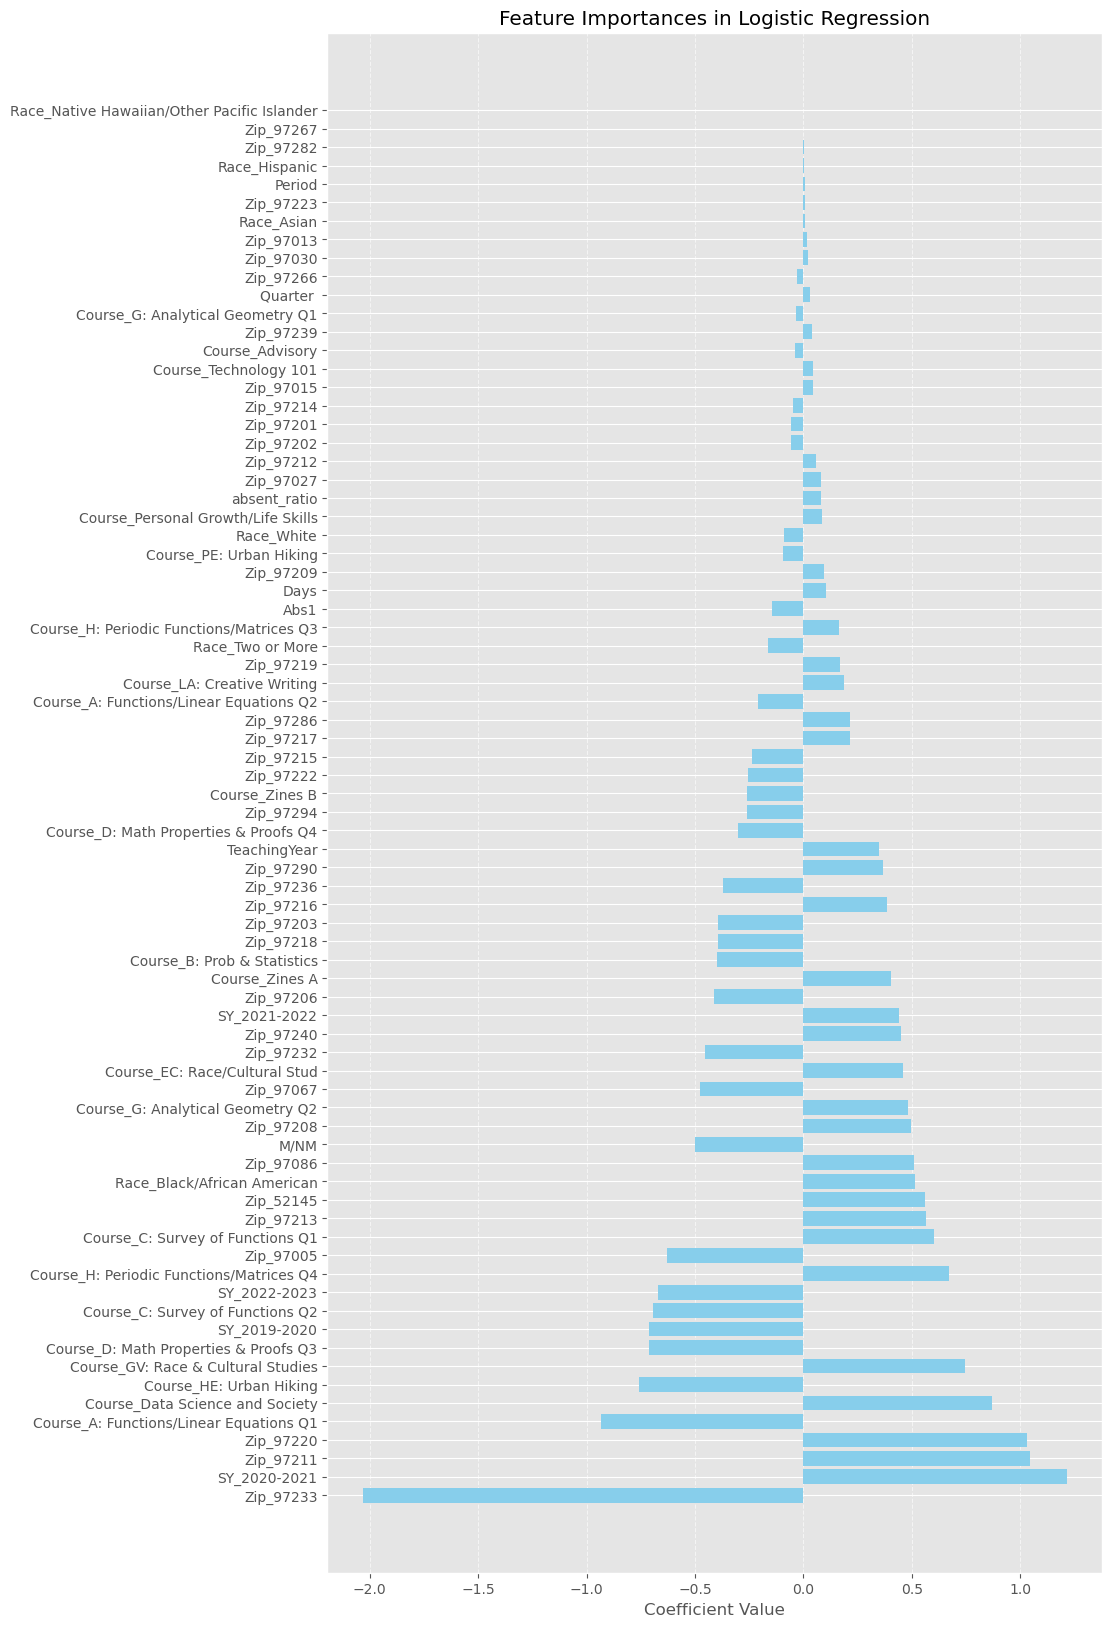

In [357]:
plt.figure(figsize=(10, 20))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importances in Logistic Regression')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

It looks like Covid year really influenced whether or not you passed. 

But looking it also looks like 97233 zip code had the biggest negative correlation, where as zips 97211 and 97220 had posistive correlations. 

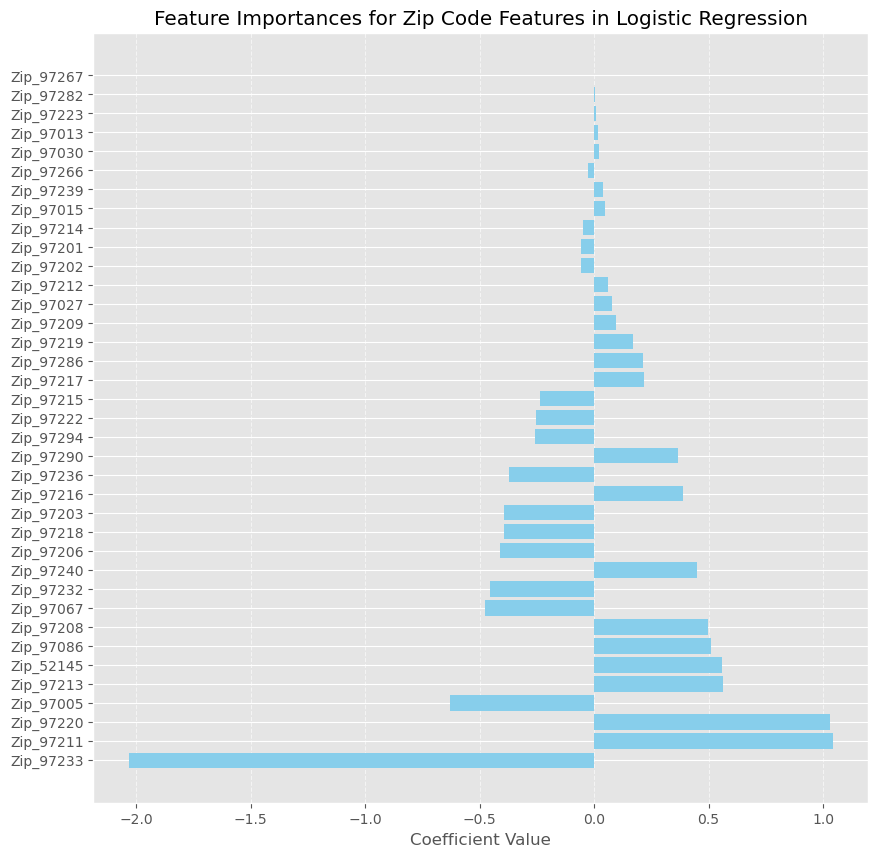

In [360]:
# Filter features that start with 'Zip_'
zip_features = feature_importance[feature_importance['Feature'].str.startswith('Zip_')]

# Plotting feature importances for 'Zip_' features
plt.figure(figsize=(10, 10))
plt.barh(zip_features['Feature'], zip_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importances for Zip Code Features in Logistic Regression')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

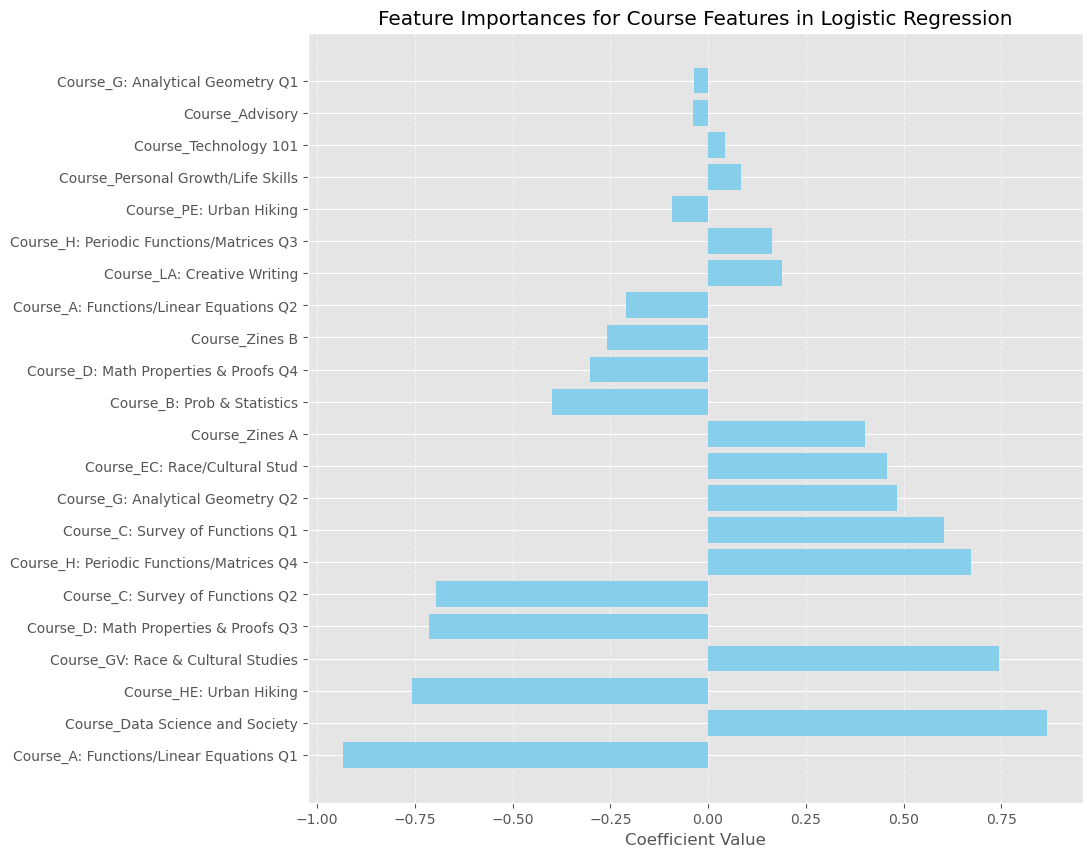

In [361]:
# Filter features that start with 'Course_'
zip_features = feature_importance[feature_importance['Feature'].str.startswith('Course_')]

# Plotting feature importances for 'Zip_' features
plt.figure(figsize=(10, 10))
plt.barh(zip_features['Feature'], zip_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importances for Course Features in Logistic Regression')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

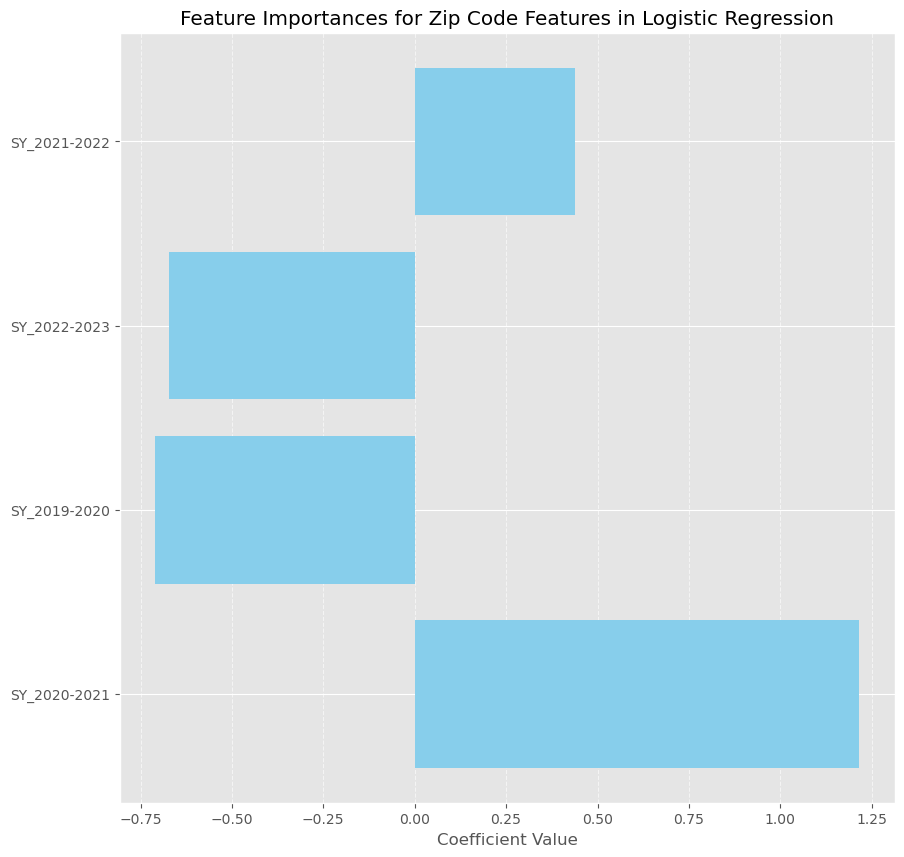

In [364]:
# Filter features that start with 'Zip_'
zip_features = feature_importance[feature_importance['Feature'].str.startswith('SY_')]

# Plotting feature importances for 'Zip_' features
plt.figure(figsize=(10, 10))
plt.barh(zip_features['Feature'], zip_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importances for Zip Code Features in Logistic Regression')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Linear regression, random forest, xgboost time!

In [ ]:
X